In [ ]:
!pip install venny4py plotly pgeocode --quiet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

bank = pd.read_csv('Bank_merged.csv')

bank.describe()

RowNumber    CustomerId       ZipCode           Age  Tenure(Years)  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000   10000.000000   
mean    5000.50000  1.569094e+07  55192.834400     37.614700       5.012800   
std     2886.89568  7.193619e+04  32063.659818      8.813649       2.892174   
min        1.00000  1.556570e+07   1040.000000     18.000000       0.000000   
25%     2500.75000  1.562853e+07  23223.000000     32.000000       3.000000   
50%     5000.50000  1.569074e+07  56430.500000     37.000000       5.000000   
75%     7500.25000  1.575323e+07  90008.000000     42.000000       7.000000   
max    10000.00000  1.581569e+07  99301.000000     88.000000      10.000000   

             Balance  Contact_12months  EstimatedSalary        Exited  \
count   10000.000000      10000.000000     10000.000000  10000.000000   
mean    76953.803388         10.487500    100090.239881      0.203700   
std     61843.020748          2.687148     57510.492818      0.402769   
min         0.000000          0.000000        11.580000      0.000000   
25%       574.000000         10.000000     51002.110000      0.000000   
50%     97198.540000         11.000000    100193.915000      0.000000   
75%    127644.240000         12.000000    149388.247500      0.000000   
max    250898.090000         13.000000    199992.480000      1.000000   

        Customer_Id   CreditScore  CustomerId.1   RepAssigned  RoboAdvisor  \
count  1.000000e+04  10000.000000  1.000000e+04  10000.000000  10000.00000   
mean   1.569094e+07    650.528800  1.569094e+07      0.625700      0.86530   
std    7.193619e+04     96.653299  7.193619e+04      0.483966      0.34142   
min    1.556570e+07    350.000000  1.556570e+07      0.000000      0.00000   
25%    1.562853e+07    584.000000  1.562853e+07      0.000000      1.00000   
50%    1.569074e+07    652.000000  1.569074e+07      1.000000      1.00000   
75%    1.575323e+07    718.000000  1.575323e+07      1.000000      1.00000   
max    1.581569e+07    850.000000  1.581569e+07      1.000000      1.00000   

       CustomerId.2  TelephoneBanking    NetBanking  MobileBanking  \
count  1.000000e+04      10000.000000  10000.000000   10000.000000   
mean   1.569094e+07          0.955200      0.934200       0.917300   
std    7.193619e+04          0.206875      0.247945       0.275442   
min    1.556570e+07          0.000000      0.000000       0.000000   
25%    1.562853e+07          1.000000      1.000000       1.000000   
50%    1.569074e+07          1.000000      1.000000       1.000000   
75%    1.575323e+07          1.000000      1.000000       1.000000   
max    1.581569e+07          1.000000      1.000000       1.000000   

         HasCrCard  
count  10000.00000  
mean       0.70550  
std        0.45584  
min        0.00000  
25%        0.00000  
50%        1.00000  
75%        1.00000  
max        1.00000

In [ ]:
bank[['RepAssigned', 'RoboAdvisor',
       'CustomerId.2', 'TelephoneBanking', 'NetBanking', 'MobileBanking',
       'HasCrCard', 'Exited']] = bank[['RepAssigned', 'RoboAdvisor',
       'CustomerId.2', 'TelephoneBanking', 'NetBanking', 'MobileBanking',
       'HasCrCard', 'Exited']].map(lambda y: 'No' if y == 0 else 'Yes')

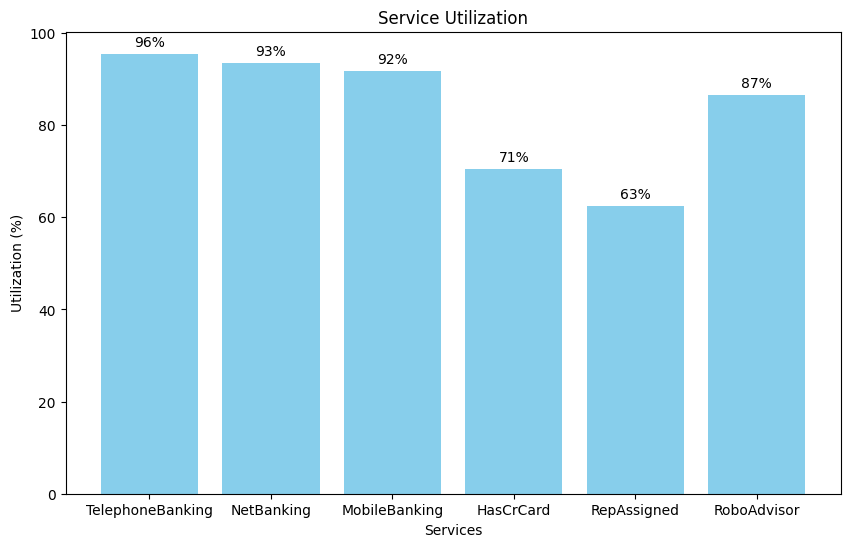

In [ ]:
# prompt: create 6 simple bars in one chart showing utilization (% 'Yes') of the following services: TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard', 'RepAssigned', 'RoboAdvisor'
# Print the utilization on top of the bars

import matplotlib.pyplot as plt
import seaborn as sns

services = ['TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard', 'RepAssigned', 'RoboAdvisor']
utilization = []

for service in services:
  utilization.append(bank[bank[service] == 'Yes'].shape[0] / bank.shape[0] * 100)

plt.figure(figsize=(10, 6))
bars = plt.bar(services, utilization, color='skyblue')
plt.title('Service Utilization')
plt.xlabel('Services')
plt.ylabel('Utilization (%)')

for bar, percentage in zip(bars, utilization):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.0f}%', ha='center', va='bottom')
plt.show()


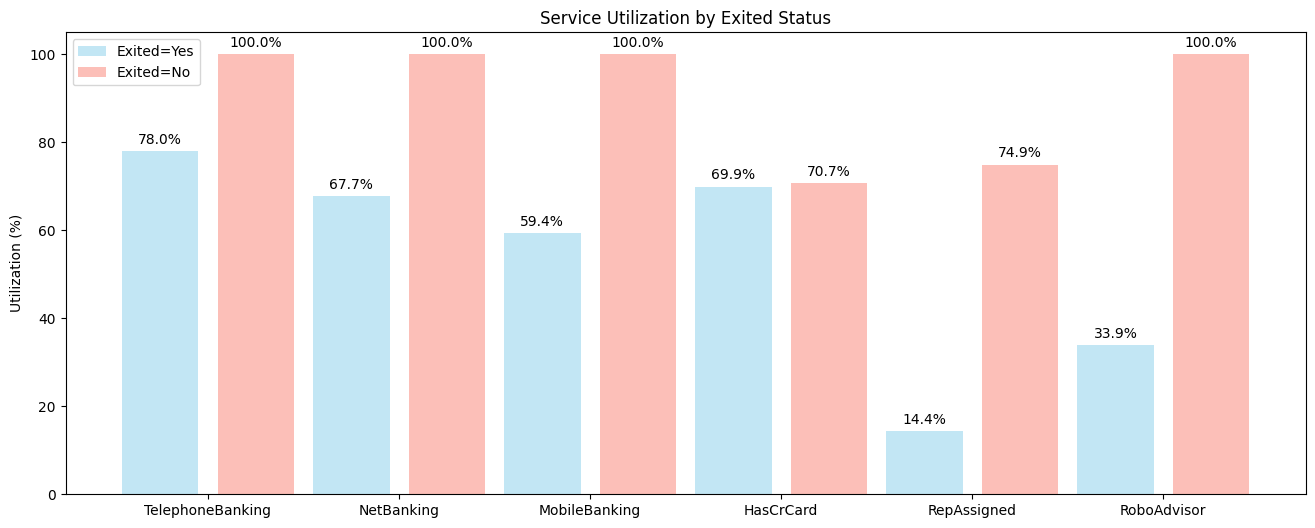

In [ ]:
# prompt: for two groups, Exited=Yes and Exited = No, create 2*6 simple bars on the SAME chart showing utilization (% 'Yes') of the following services: TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard', 'RepAssigned', 'RoboAdvisor' - make the bar colors transparent (alpha=0.5) and add labels
# Print the utilization on top of the bars

import matplotlib.pyplot as plt
import seaborn as sns

services = ['TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard', 'RepAssigned', 'RoboAdvisor']

fig, ax = plt.subplots(figsize=(16, 6))

# Exited = Yes
for i, service in enumerate(services):
    utilization = bank[bank['Exited'] == 'Yes'][service].value_counts(normalize=True) * 100
    yes_util = utilization.get('Yes', 0)  # Handle cases where 'Yes' might not be present

    ax.bar(i * 2, yes_util, label='Exited=Yes' if i == 0 else "", color='skyblue', alpha=0.5, width=0.8)
    ax.text(i * 2, yes_util + 1, f"{yes_util:.1f}%", ha='center', va='bottom')

# Exited = No
for i, service in enumerate(services):
    utilization = bank[bank['Exited'] == 'No'][service].value_counts(normalize=True) * 100
    no_util = utilization.get('Yes', 0)

    ax.bar(i * 2 + 1, no_util, label='Exited=No' if i == 0 else "", color='salmon', alpha=0.5, width=0.8)
    ax.text(i * 2 + 1, no_util + 1, f"{no_util:.1f}%", ha='center', va='bottom')

ax.set_xticks([i * 2 + 0.5 for i in range(len(services))])
ax.set_xticklabels(services)
ax.set_ylabel('Utilization (%)')
ax.set_title('Service Utilization by Exited Status')
ax.legend()
plt.show()

In [ ]:
bank.groupby('TelephoneBanking').size().sort_index(ascending=False).to_dict()

{'Yes': 9552, 'No': 448}

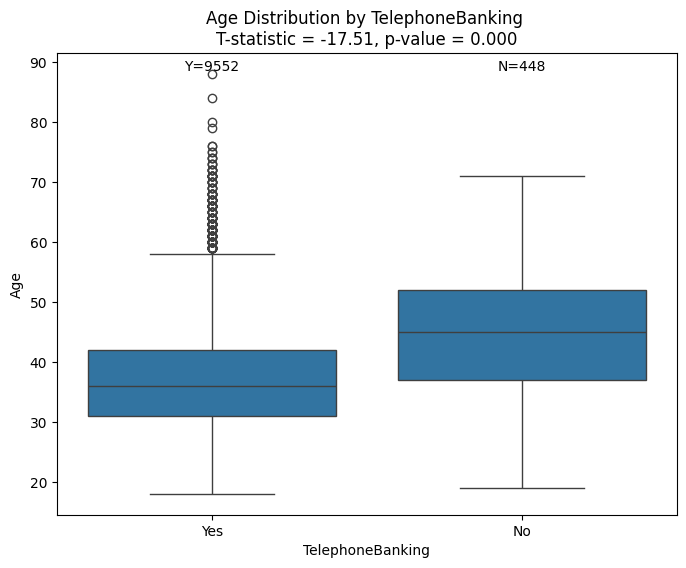

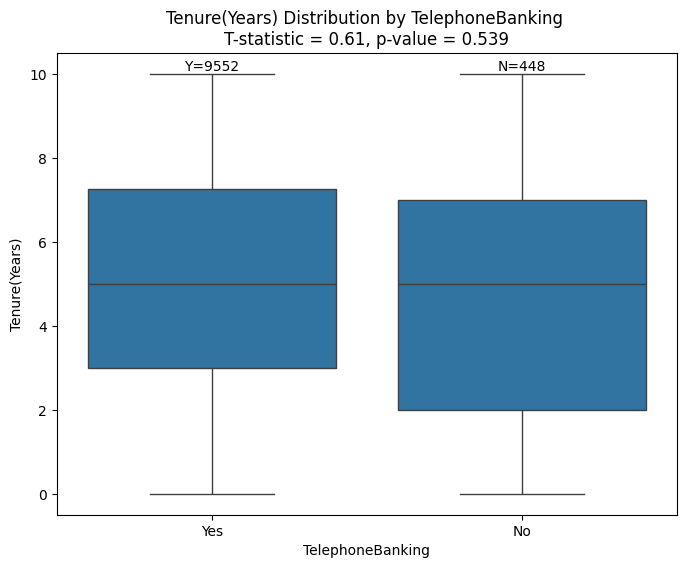

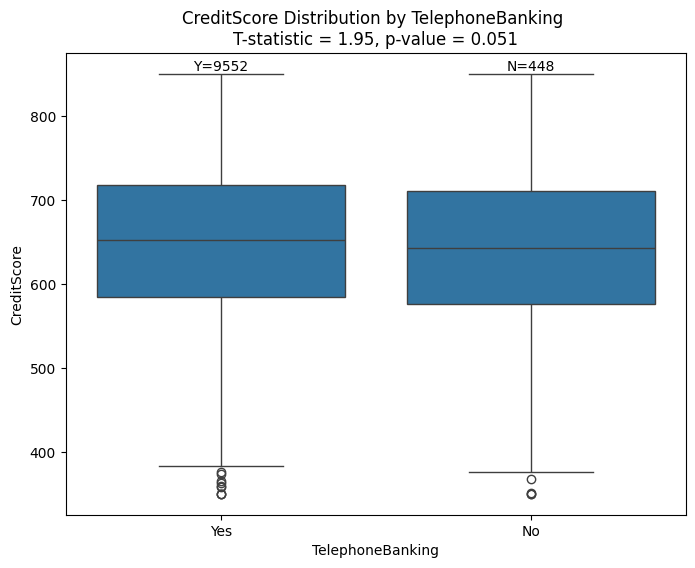

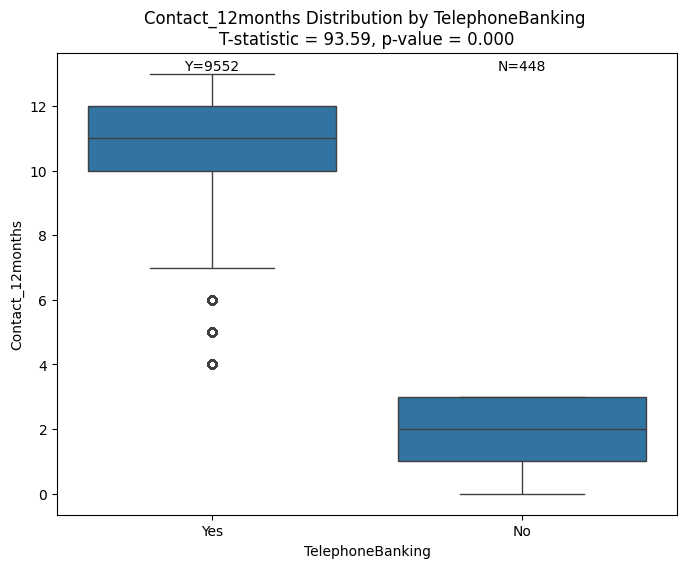

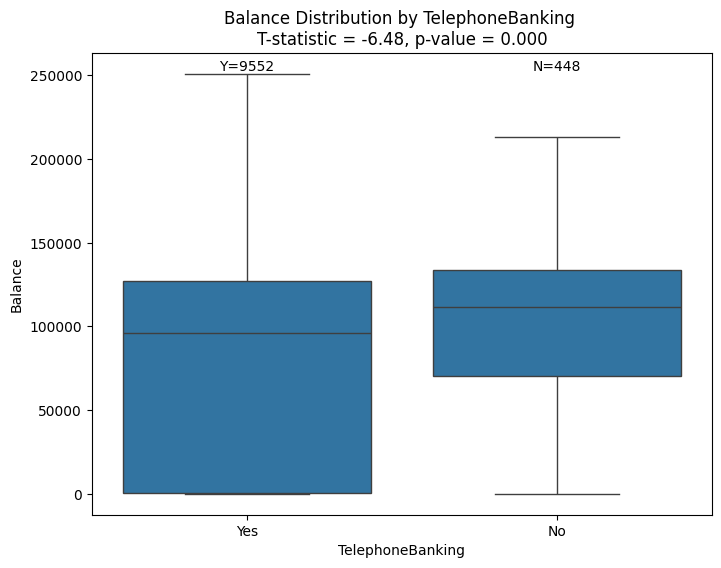

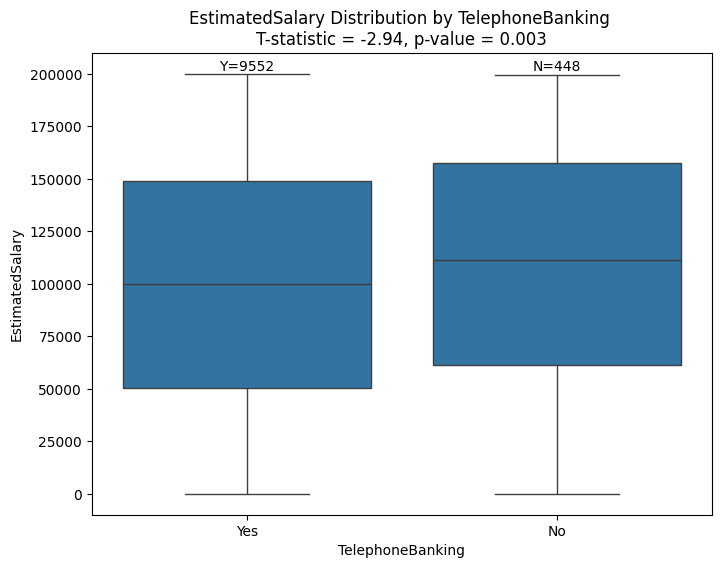

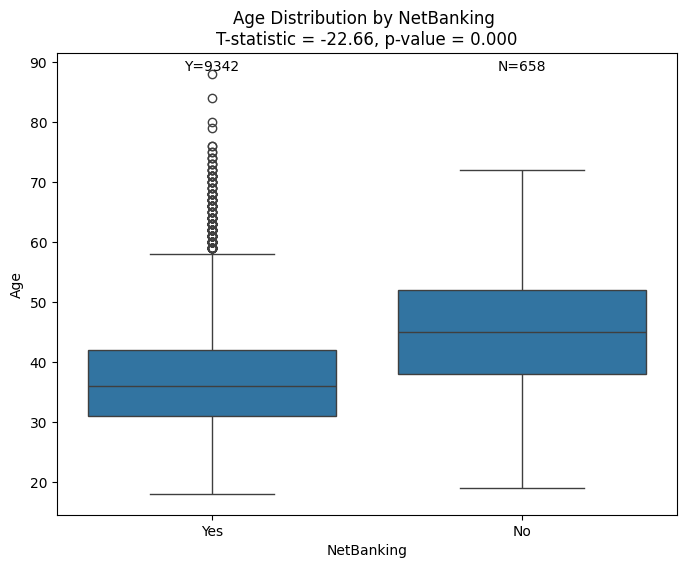

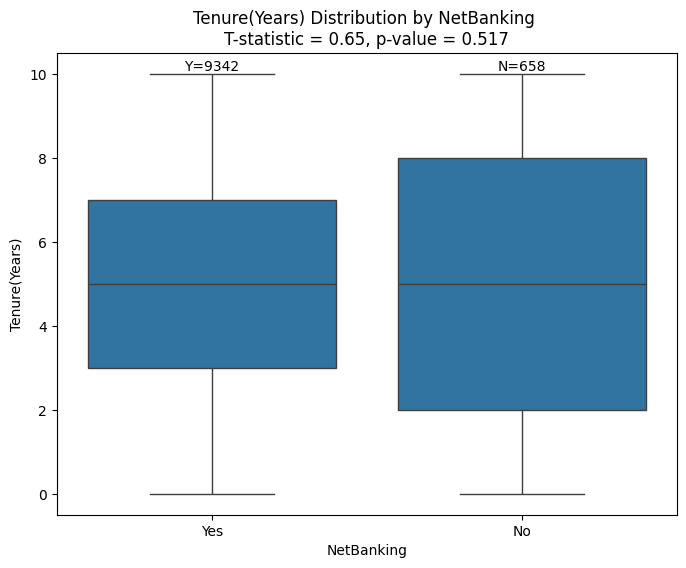

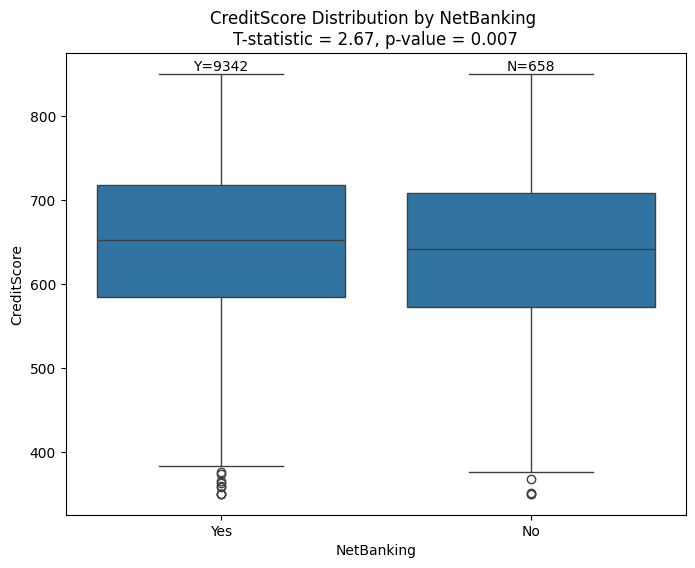

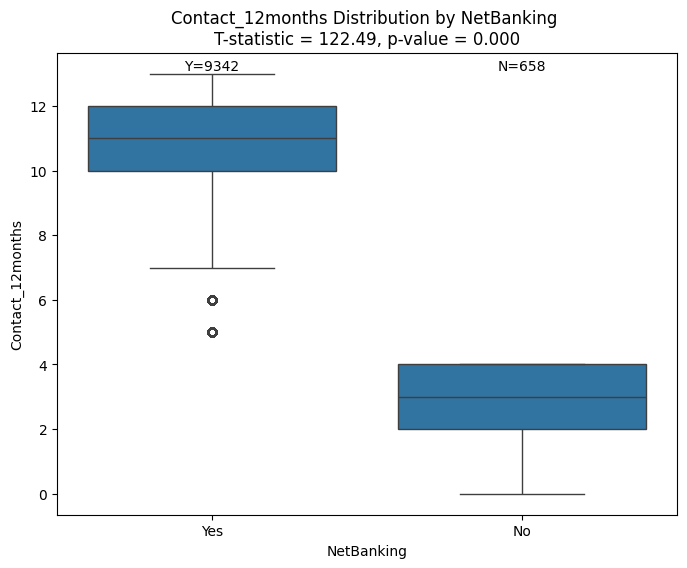

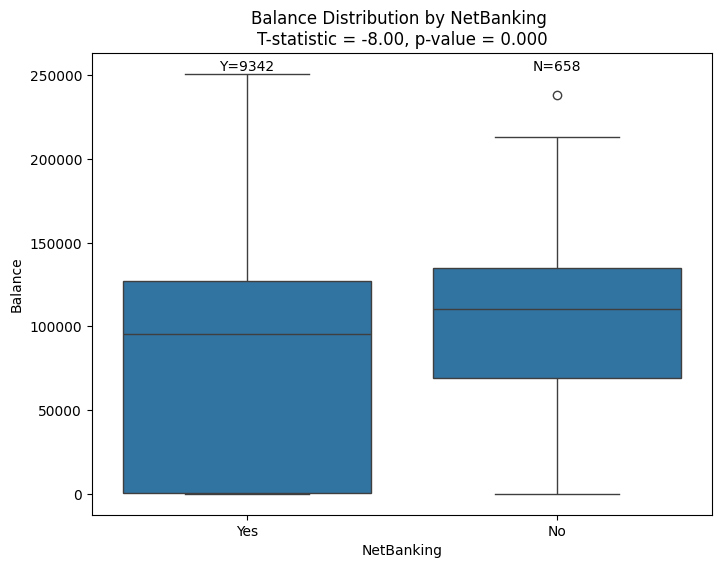

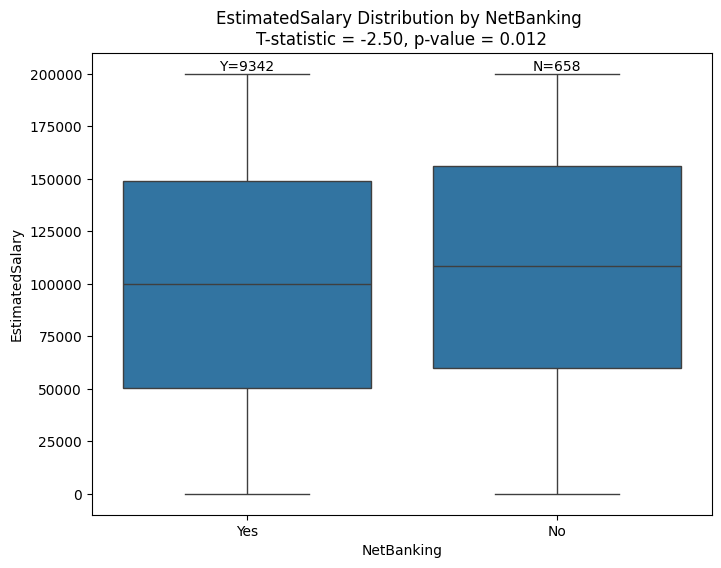

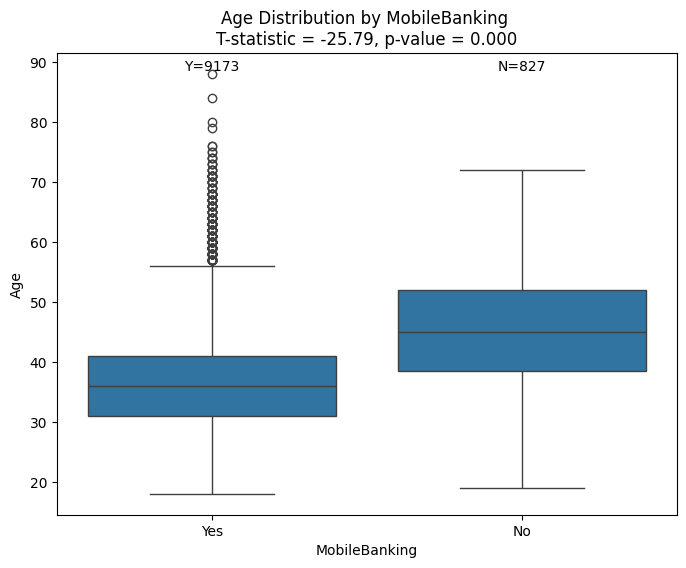

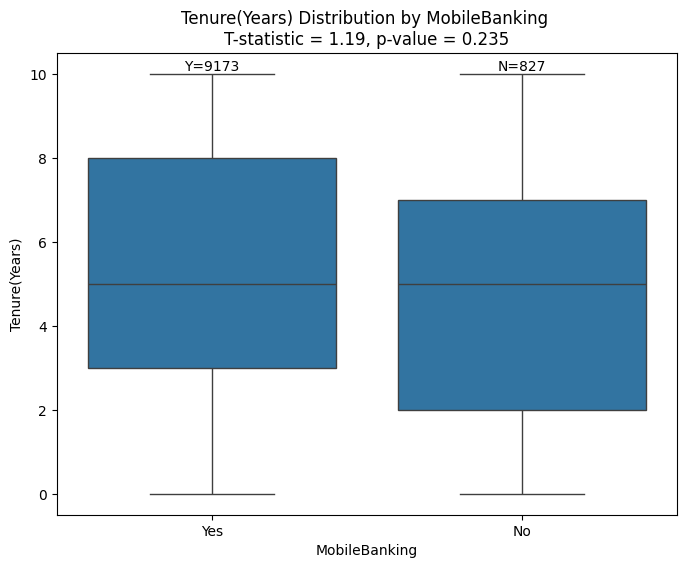

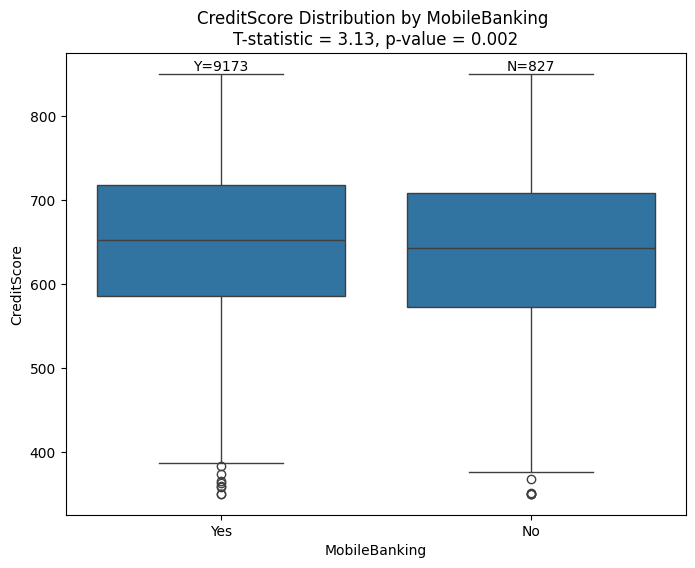

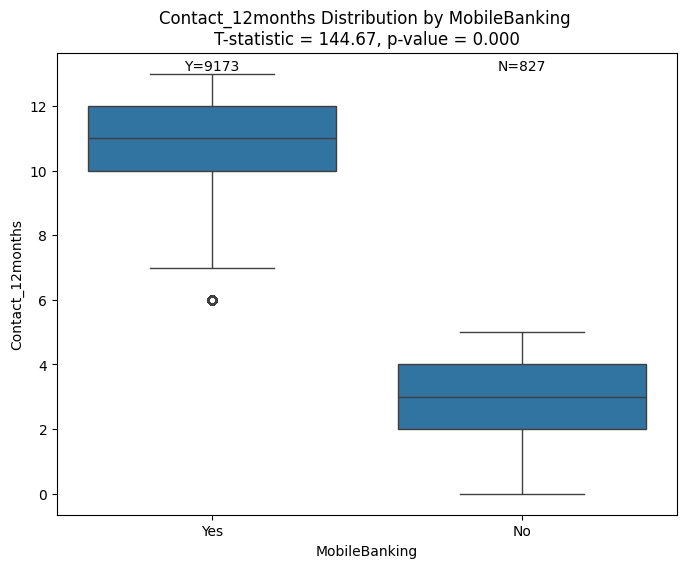

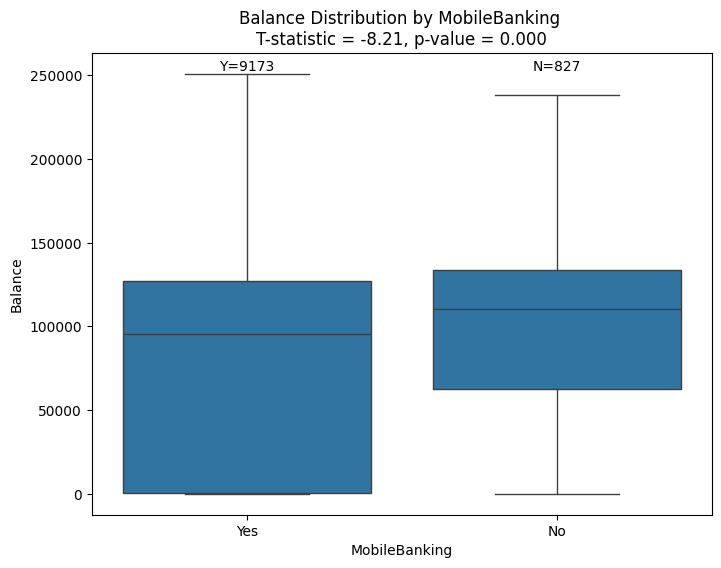

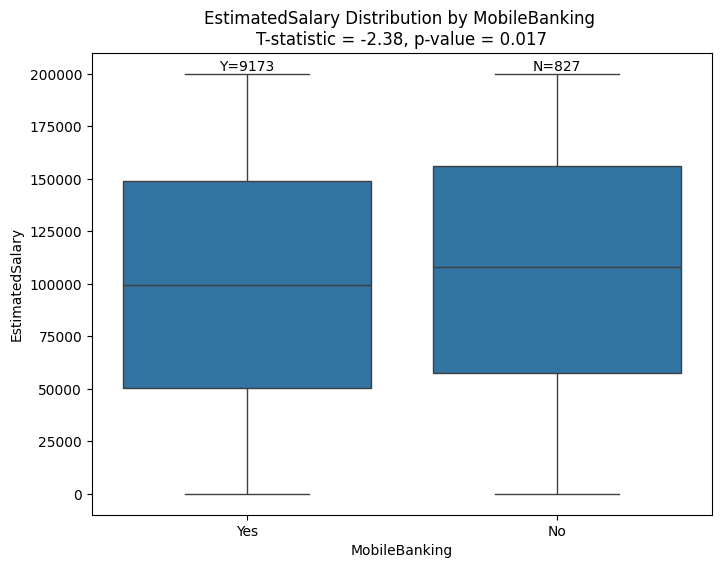

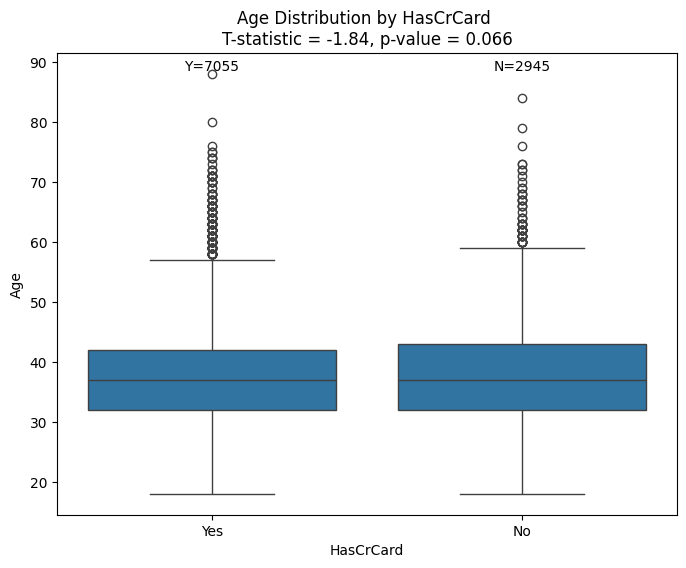

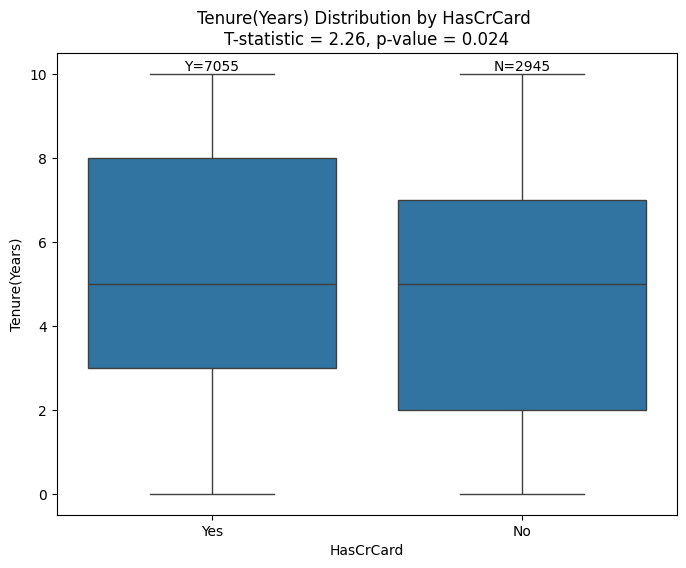

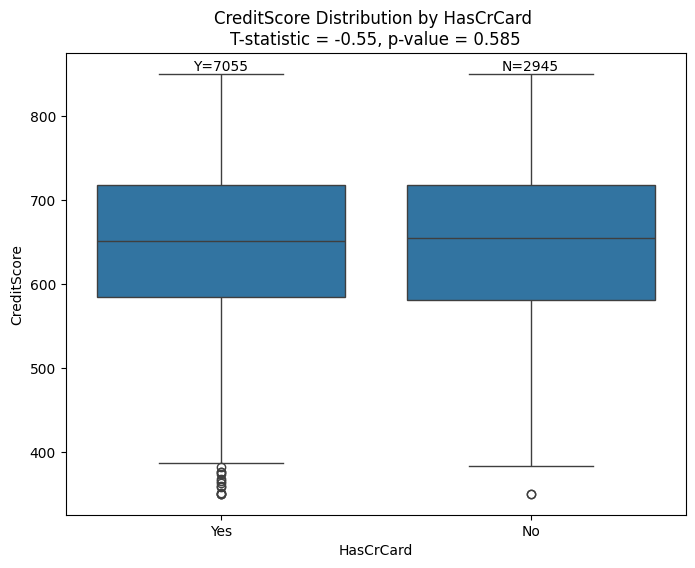

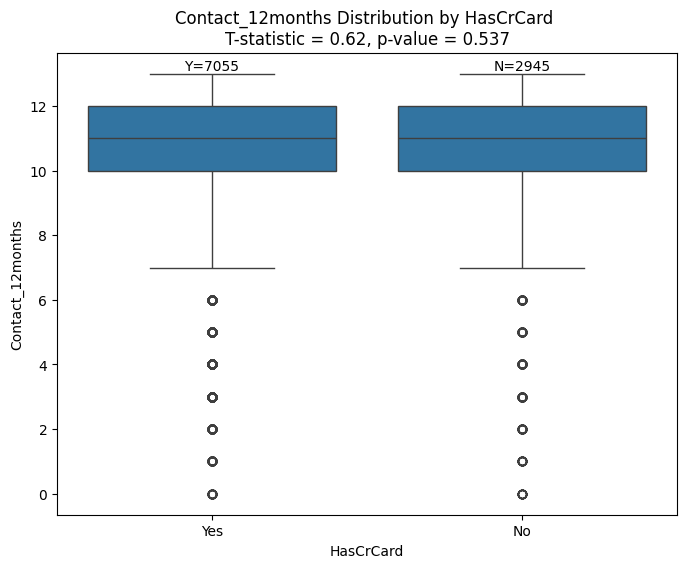

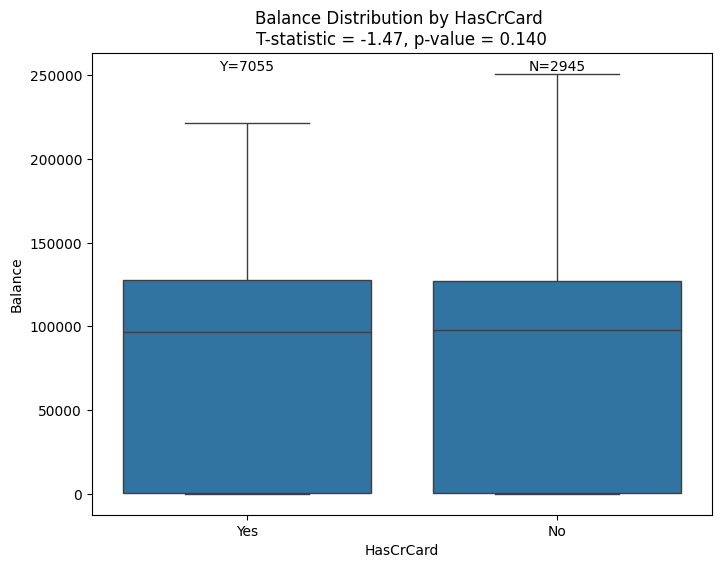

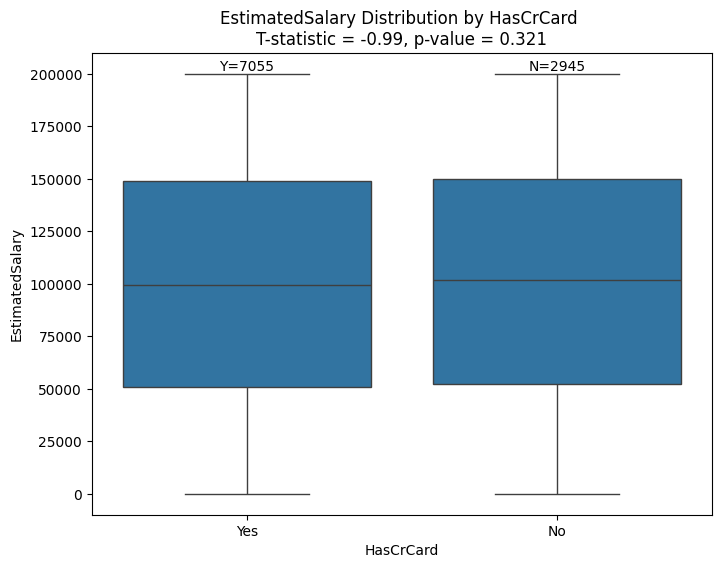

In [ ]:
def plot_boxplot_with_counts(x_col, y_col):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=x_col, y=y_col, data=bank, order=['Yes', 'No']) #very important otherwise the labels are mixed up!

  group1 = bank[bank[x_col] == 'Yes'][y_col]
  group2 = bank[bank[x_col] == 'No'][y_col]
  t_statistic, p_value = ttest_ind(group1, group2)

  plt.title(f'{y_col} Distribution by {x_col} \nT-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}')

  # Calculate and add counts for each category
  counts = bank.groupby(x_col).size().sort_index(ascending=False) #very important otherwise the group1,2 numbers might be mixed up!!
  for i, count in enumerate(counts):
    if i == 0:
      key = 'Y'
    else:
      key = 'N'
    plt.text(i, bank[y_col].max(), f'{key}={count}', ha='center', va='bottom')

  plt.show()

# Example usage
plot_boxplot_with_counts('TelephoneBanking', 'Age')
plot_boxplot_with_counts('TelephoneBanking', 'Tenure(Years)')
plot_boxplot_with_counts('TelephoneBanking', 'CreditScore')
plot_boxplot_with_counts('TelephoneBanking', 'Contact_12months')
plot_boxplot_with_counts('TelephoneBanking', 'Balance')
plot_boxplot_with_counts('TelephoneBanking', 'EstimatedSalary')

plot_boxplot_with_counts('NetBanking', 'Age')
plot_boxplot_with_counts('NetBanking', 'Tenure(Years)')
plot_boxplot_with_counts('NetBanking', 'CreditScore')
plot_boxplot_with_counts('NetBanking', 'Contact_12months')
plot_boxplot_with_counts('NetBanking', 'Balance')
plot_boxplot_with_counts('NetBanking', 'EstimatedSalary')

plot_boxplot_with_counts('MobileBanking', 'Age')
plot_boxplot_with_counts('MobileBanking', 'Tenure(Years)')
plot_boxplot_with_counts('MobileBanking', 'CreditScore')
plot_boxplot_with_counts('MobileBanking', 'Contact_12months')
plot_boxplot_with_counts('MobileBanking', 'Balance')
plot_boxplot_with_counts('MobileBanking', 'EstimatedSalary')

plot_boxplot_with_counts('HasCrCard', 'Age')
plot_boxplot_with_counts('HasCrCard', 'Tenure(Years)')
plot_boxplot_with_counts('HasCrCard', 'CreditScore')
plot_boxplot_with_counts('HasCrCard', 'Contact_12months')
plot_boxplot_with_counts('HasCrCard', 'Balance')
plot_boxplot_with_counts('HasCrCard', 'EstimatedSalary')

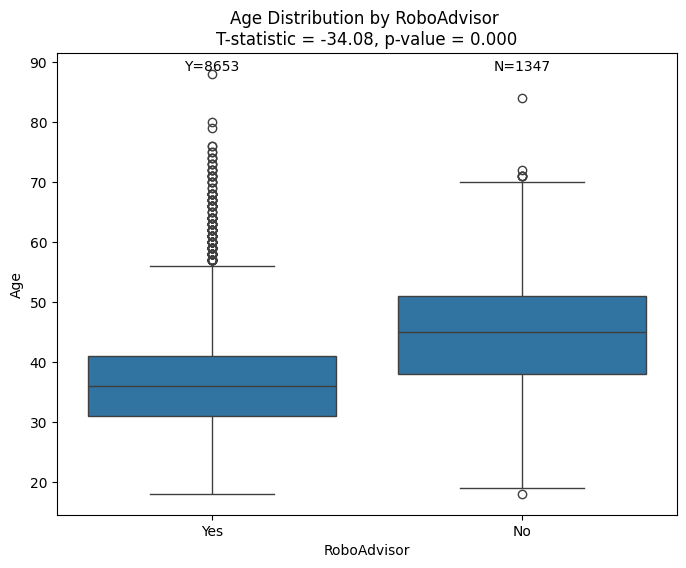

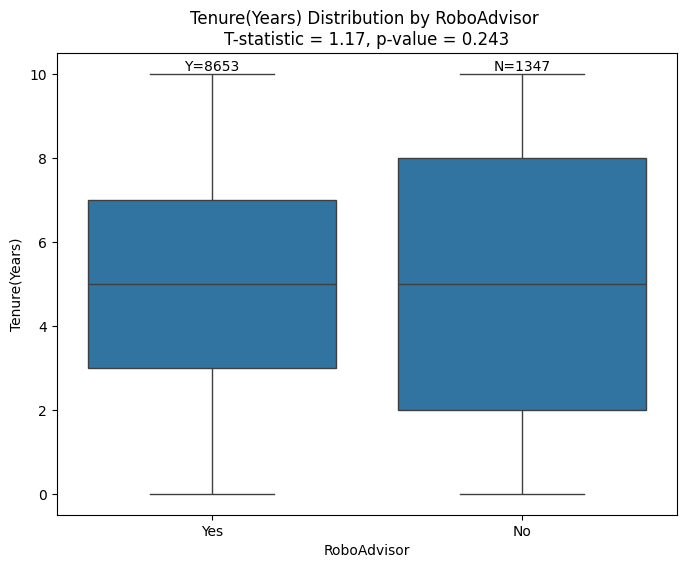

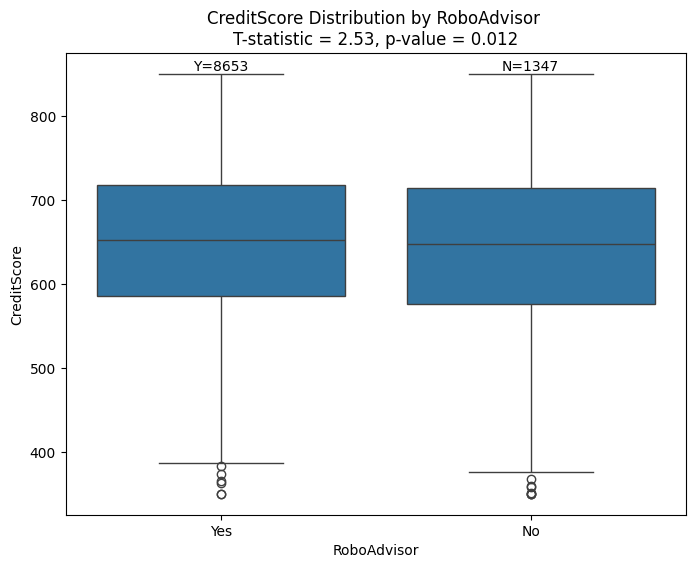

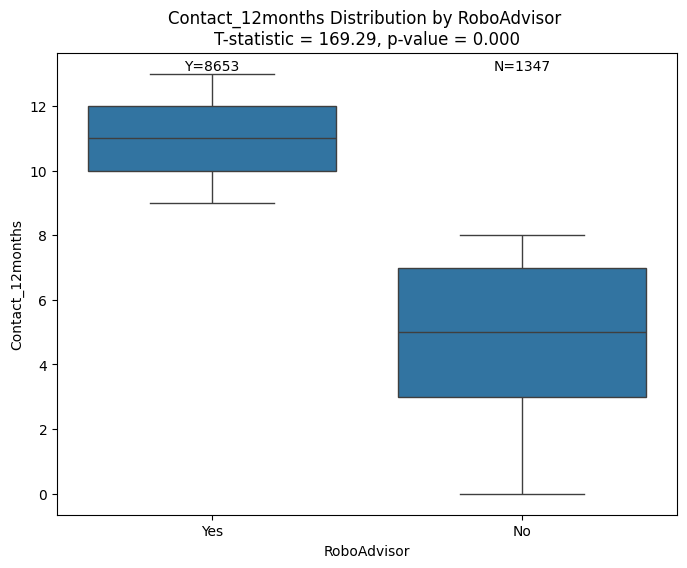

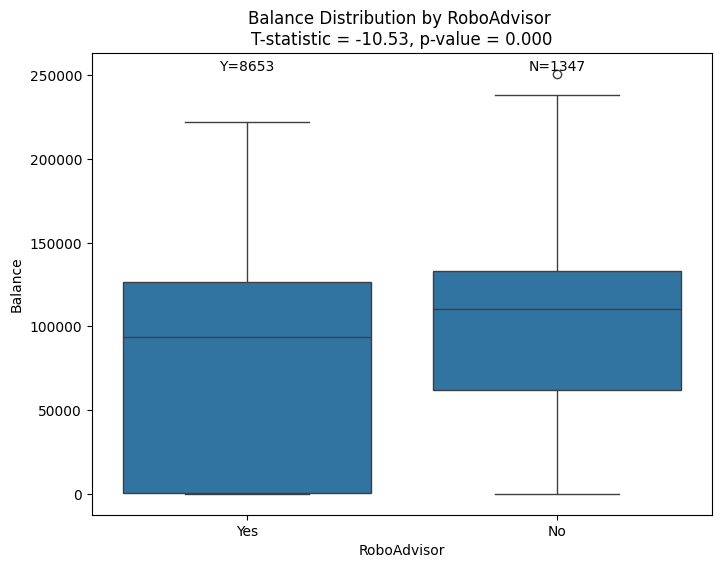

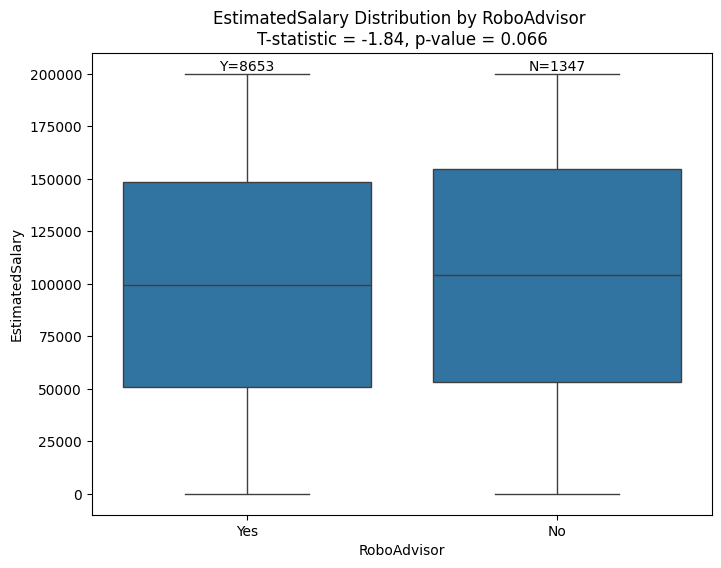

In [ ]:
plot_boxplot_with_counts('RoboAdvisor', 'Age')
plot_boxplot_with_counts('RoboAdvisor', 'Tenure(Years)')
plot_boxplot_with_counts('RoboAdvisor', 'CreditScore')
plot_boxplot_with_counts('RoboAdvisor', 'Contact_12months')
plot_boxplot_with_counts('RoboAdvisor', 'Balance')
plot_boxplot_with_counts('RoboAdvisor', 'EstimatedSalary')

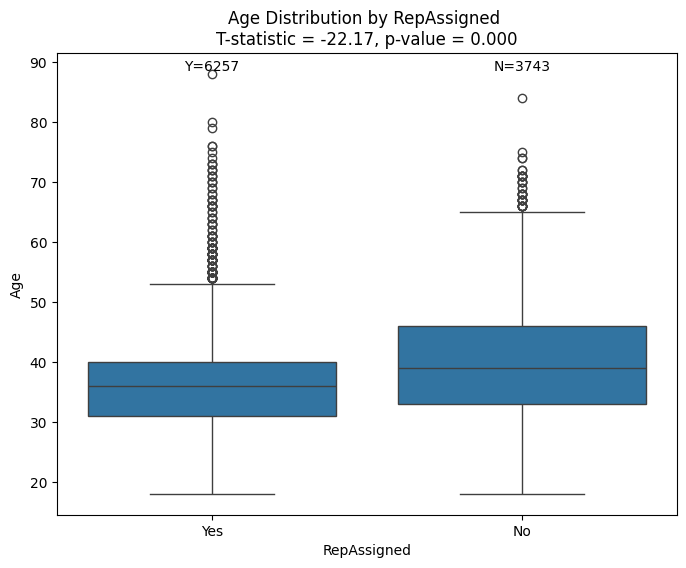

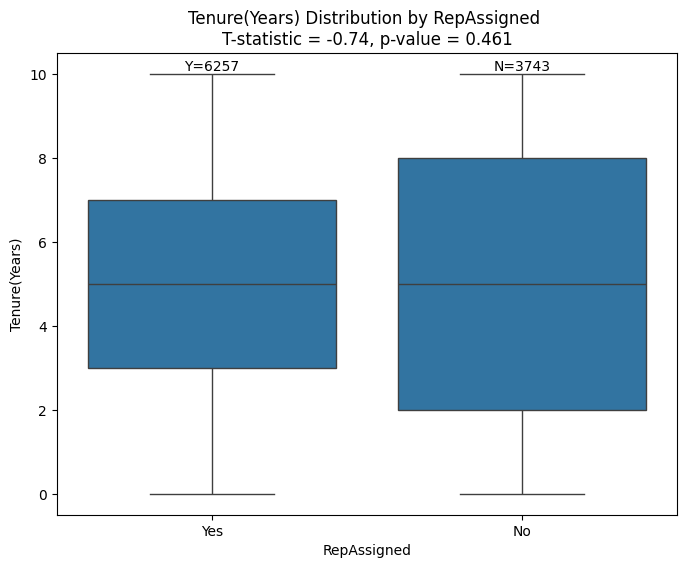

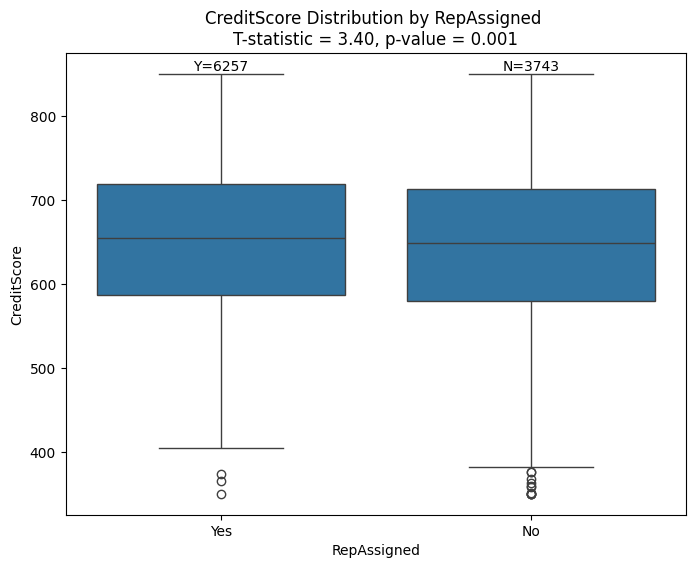

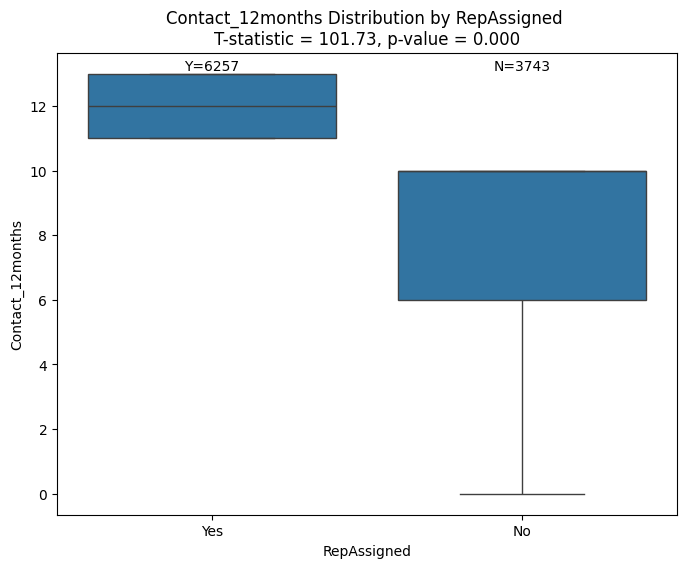

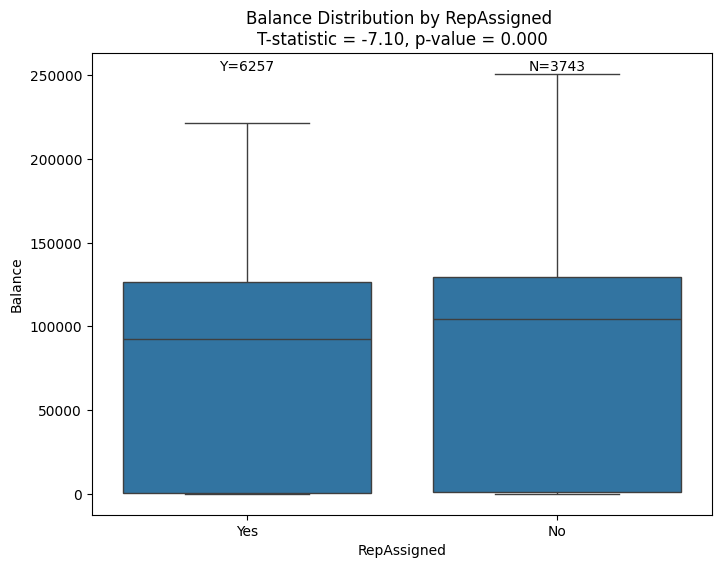

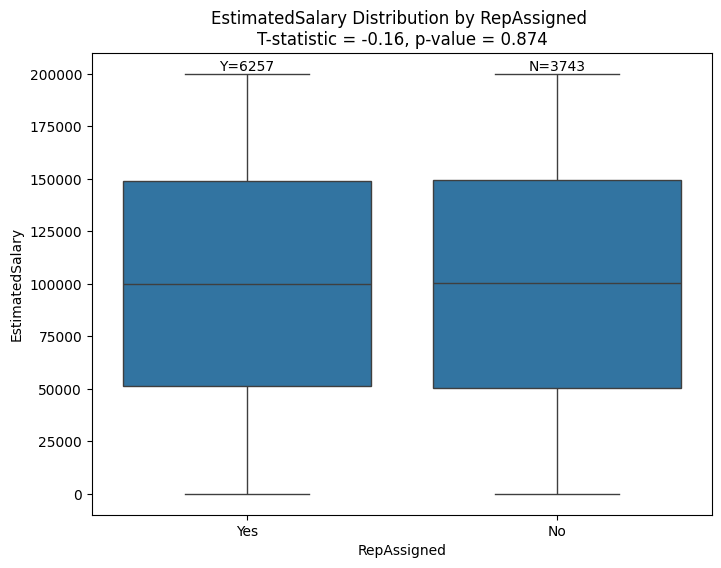

In [ ]:
plot_boxplot_with_counts('RepAssigned', 'Age')
plot_boxplot_with_counts('RepAssigned', 'Tenure(Years)')
plot_boxplot_with_counts('RepAssigned', 'CreditScore')
plot_boxplot_with_counts('RepAssigned', 'Contact_12months')
plot_boxplot_with_counts('RepAssigned', 'Balance')
plot_boxplot_with_counts('RepAssigned', 'EstimatedSalary')

In [ ]:
bank.loc[bank.Exited=='No', 'Contact_12months'].value_counts()

Contact_12months
11    2061
10    1999
13    1995
12    1908
Name: count, dtype: int64

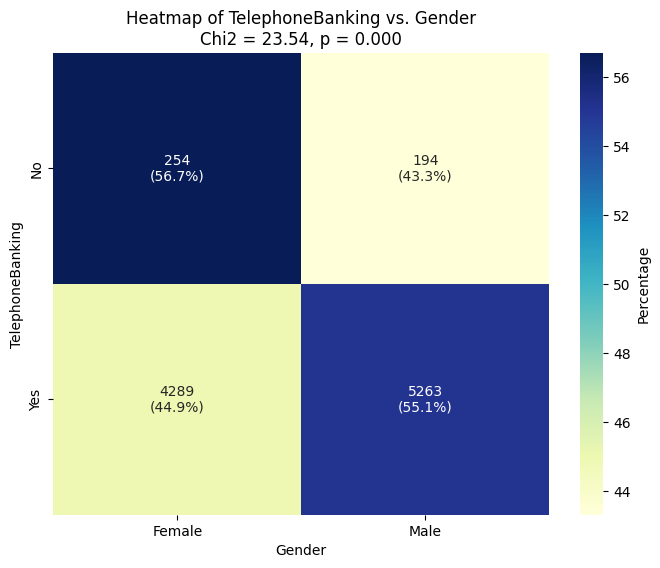

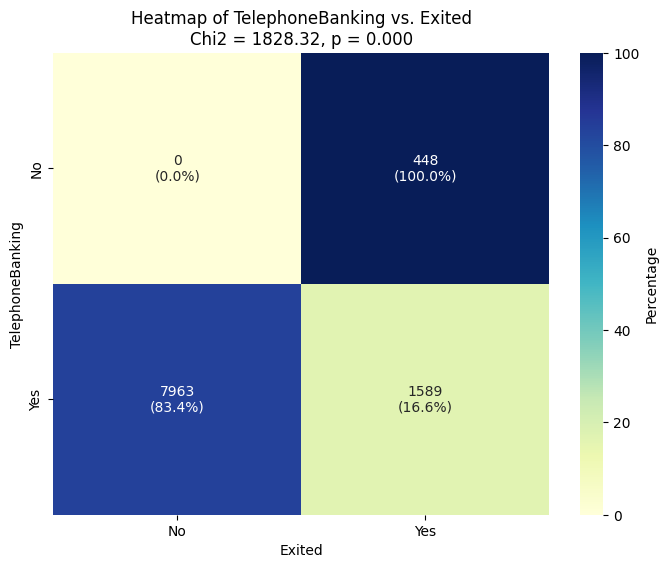

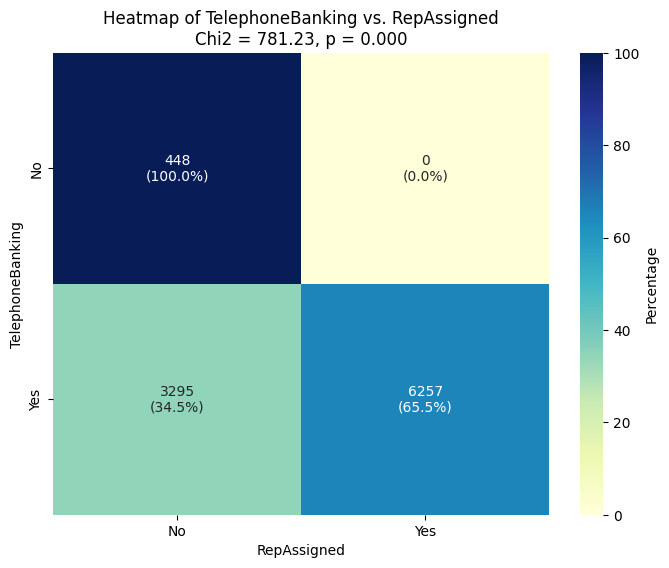

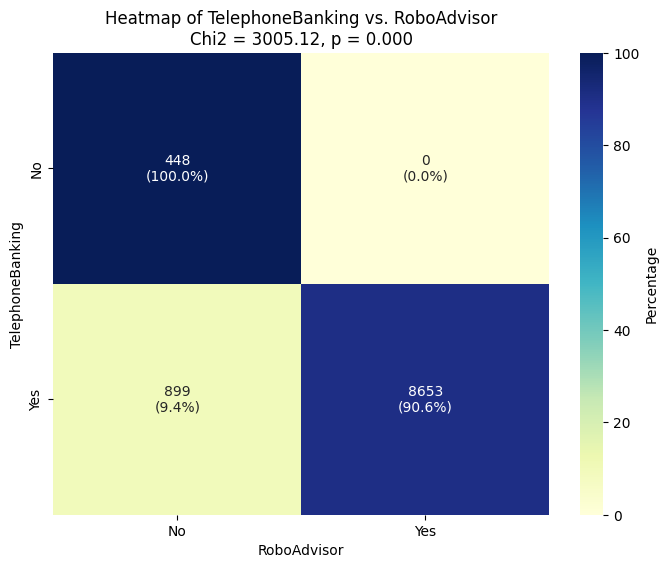

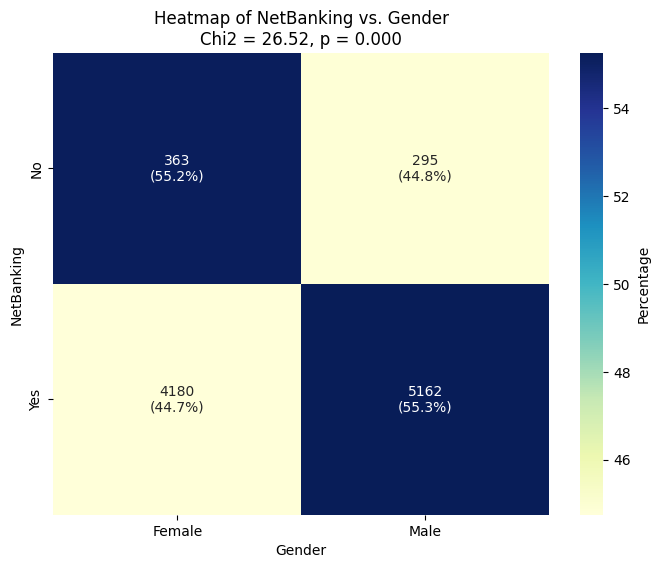

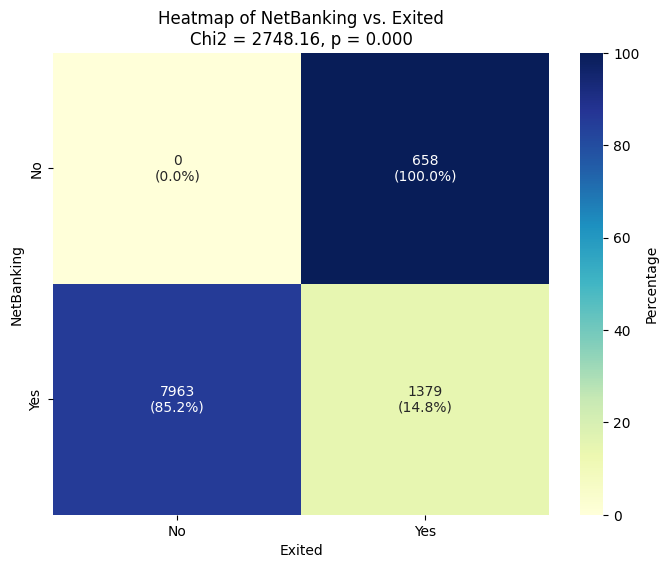

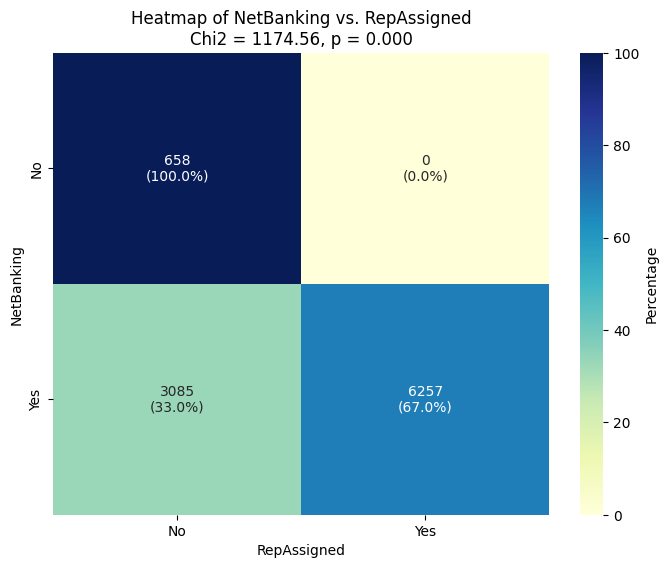

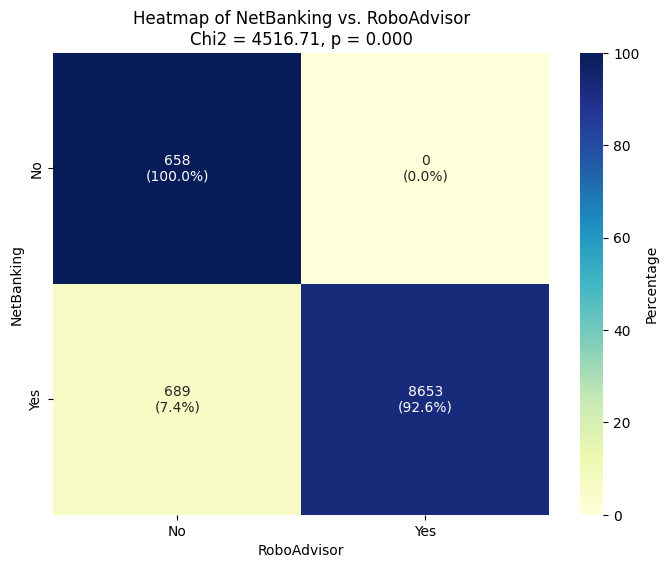

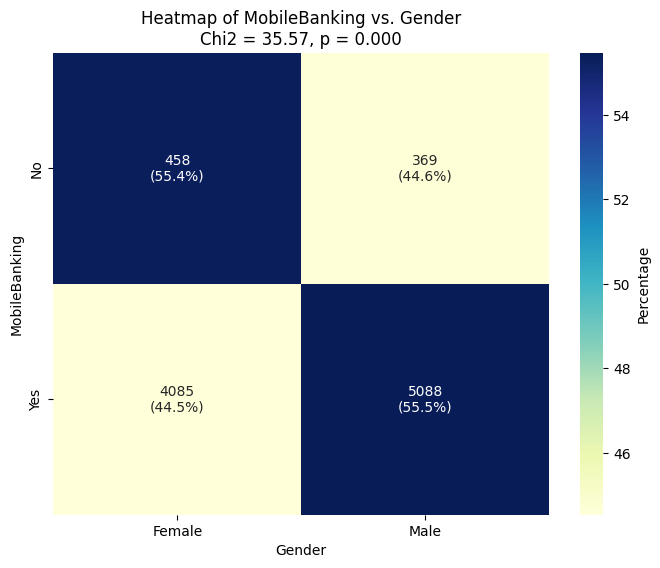

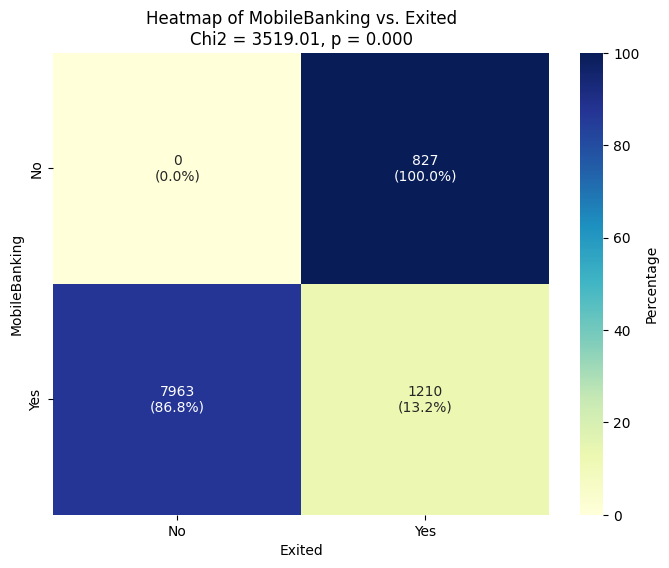

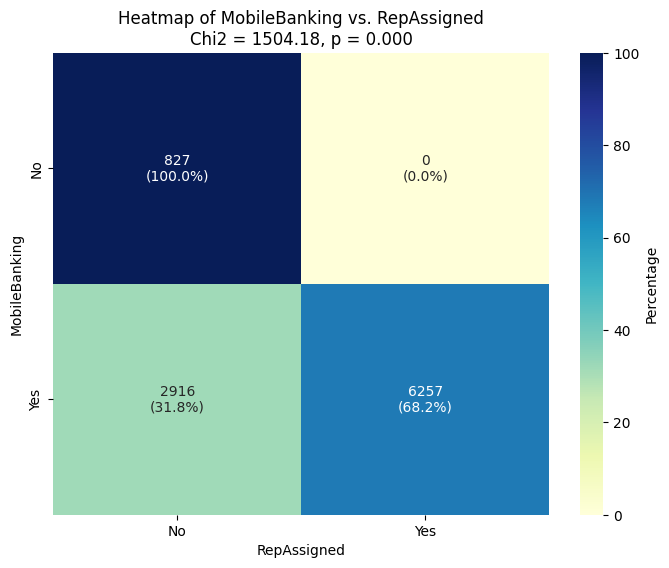

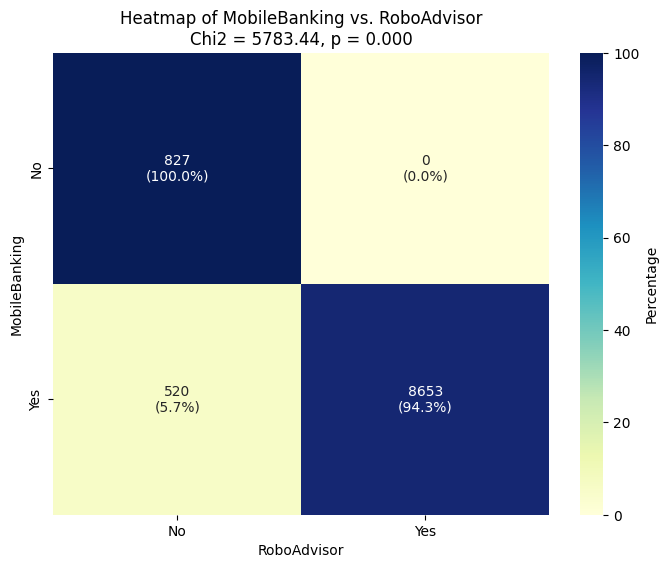

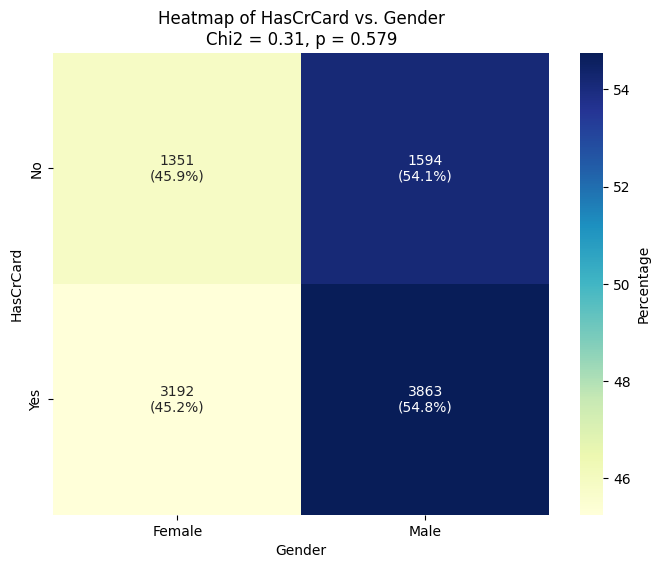

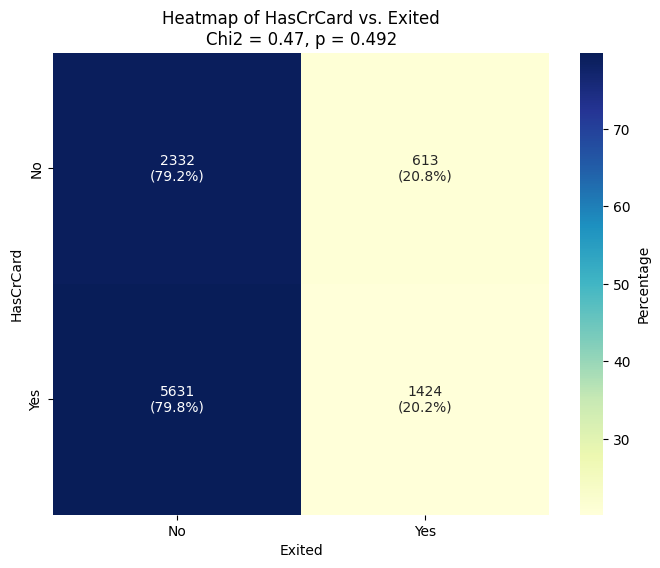

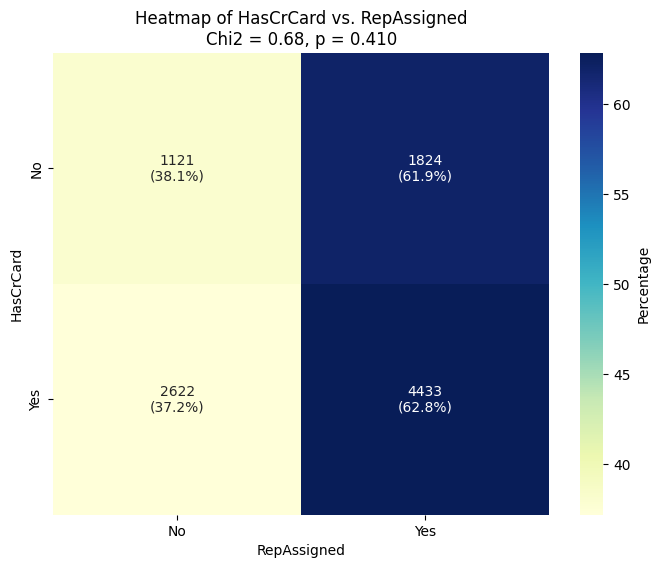

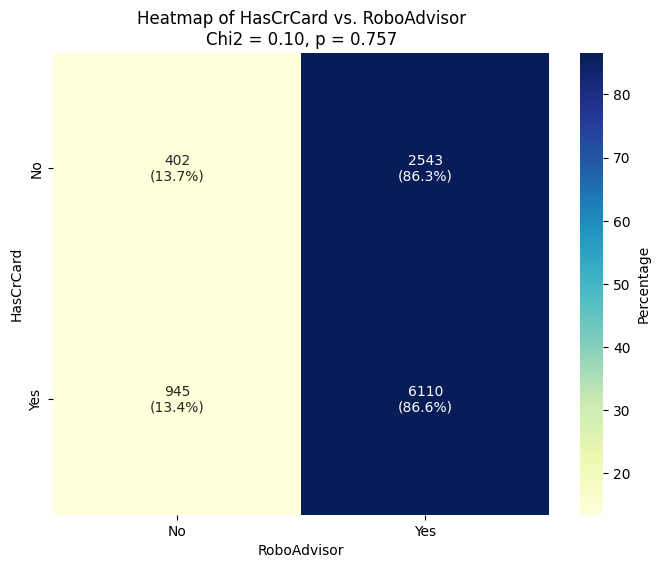

In [ ]:
# prompt: for each of the following binary variables: Gender, Exited, RepAssigned, RoboAdvisor make a 2 by 2 heatmap with the following binary variables: TelephoneBanking, NetBanking, MobileBanking, HasCrCard (for each there are two options: Yes meaning customer is using the service and No)
# Add actual numbers as well as percentages (totalling 100 for each row) in each heatmap cell
# Using the Chi Squared test for these 2 by 2 heatmaps, calculate the statistical significance of each

from scipy.stats import chi2_contingency

binary_variables = ['Gender', 'Exited', 'RepAssigned', 'RoboAdvisor']
dependent_variables = ['TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard']

for dependent in dependent_variables:
  for independent in binary_variables:
    # Create the contingency table
    contingency_table = pd.crosstab(bank[dependent], bank[independent])

    # Calculate percentages
    contingency_table_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    # Combine counts and percentages for the heatmap annotations
    annotations = contingency_table.astype(str) + '\n(' + contingency_table_percentages.round(1).astype(str) + '%)'


    # Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table_percentages, annot=annotations, fmt='', cmap="YlGnBu",
                cbar_kws={'label': 'Percentage'})
    plt.title(f'Heatmap of {dependent} vs. {independent}\nChi2 = {chi2:.2f}, p = {p:.3f}')
    plt.xlabel(independent)
    plt.ylabel(dependent)
    plt.show()

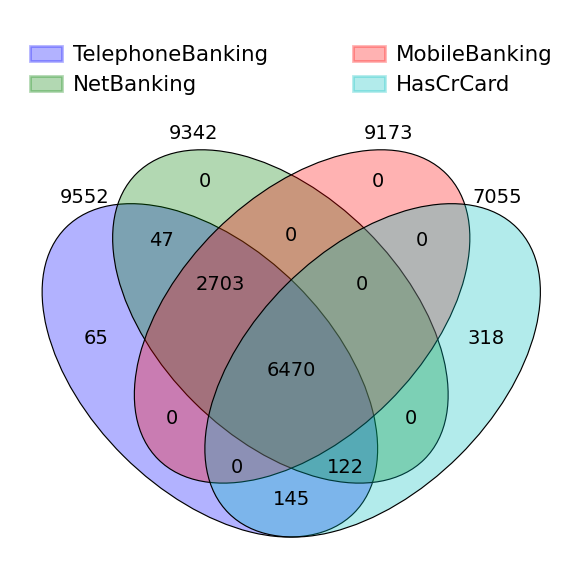

In [ ]:
from venny4py.venny4py import *

sets = {
    'TelephoneBanking': set(list(bank.loc[bank['TelephoneBanking'] == 'Yes', 'Customer_Id'])),
    'NetBanking': set(list(bank.loc[bank['NetBanking'] == 'Yes', 'Customer_Id'])),
    'MobileBanking': set(list(bank.loc[bank['MobileBanking'] == 'Yes', 'Customer_Id'])),
    'HasCrCard': set(list(bank.loc[bank['HasCrCard'] == 'Yes', 'Customer_Id']))}

venny4py(sets=sets)

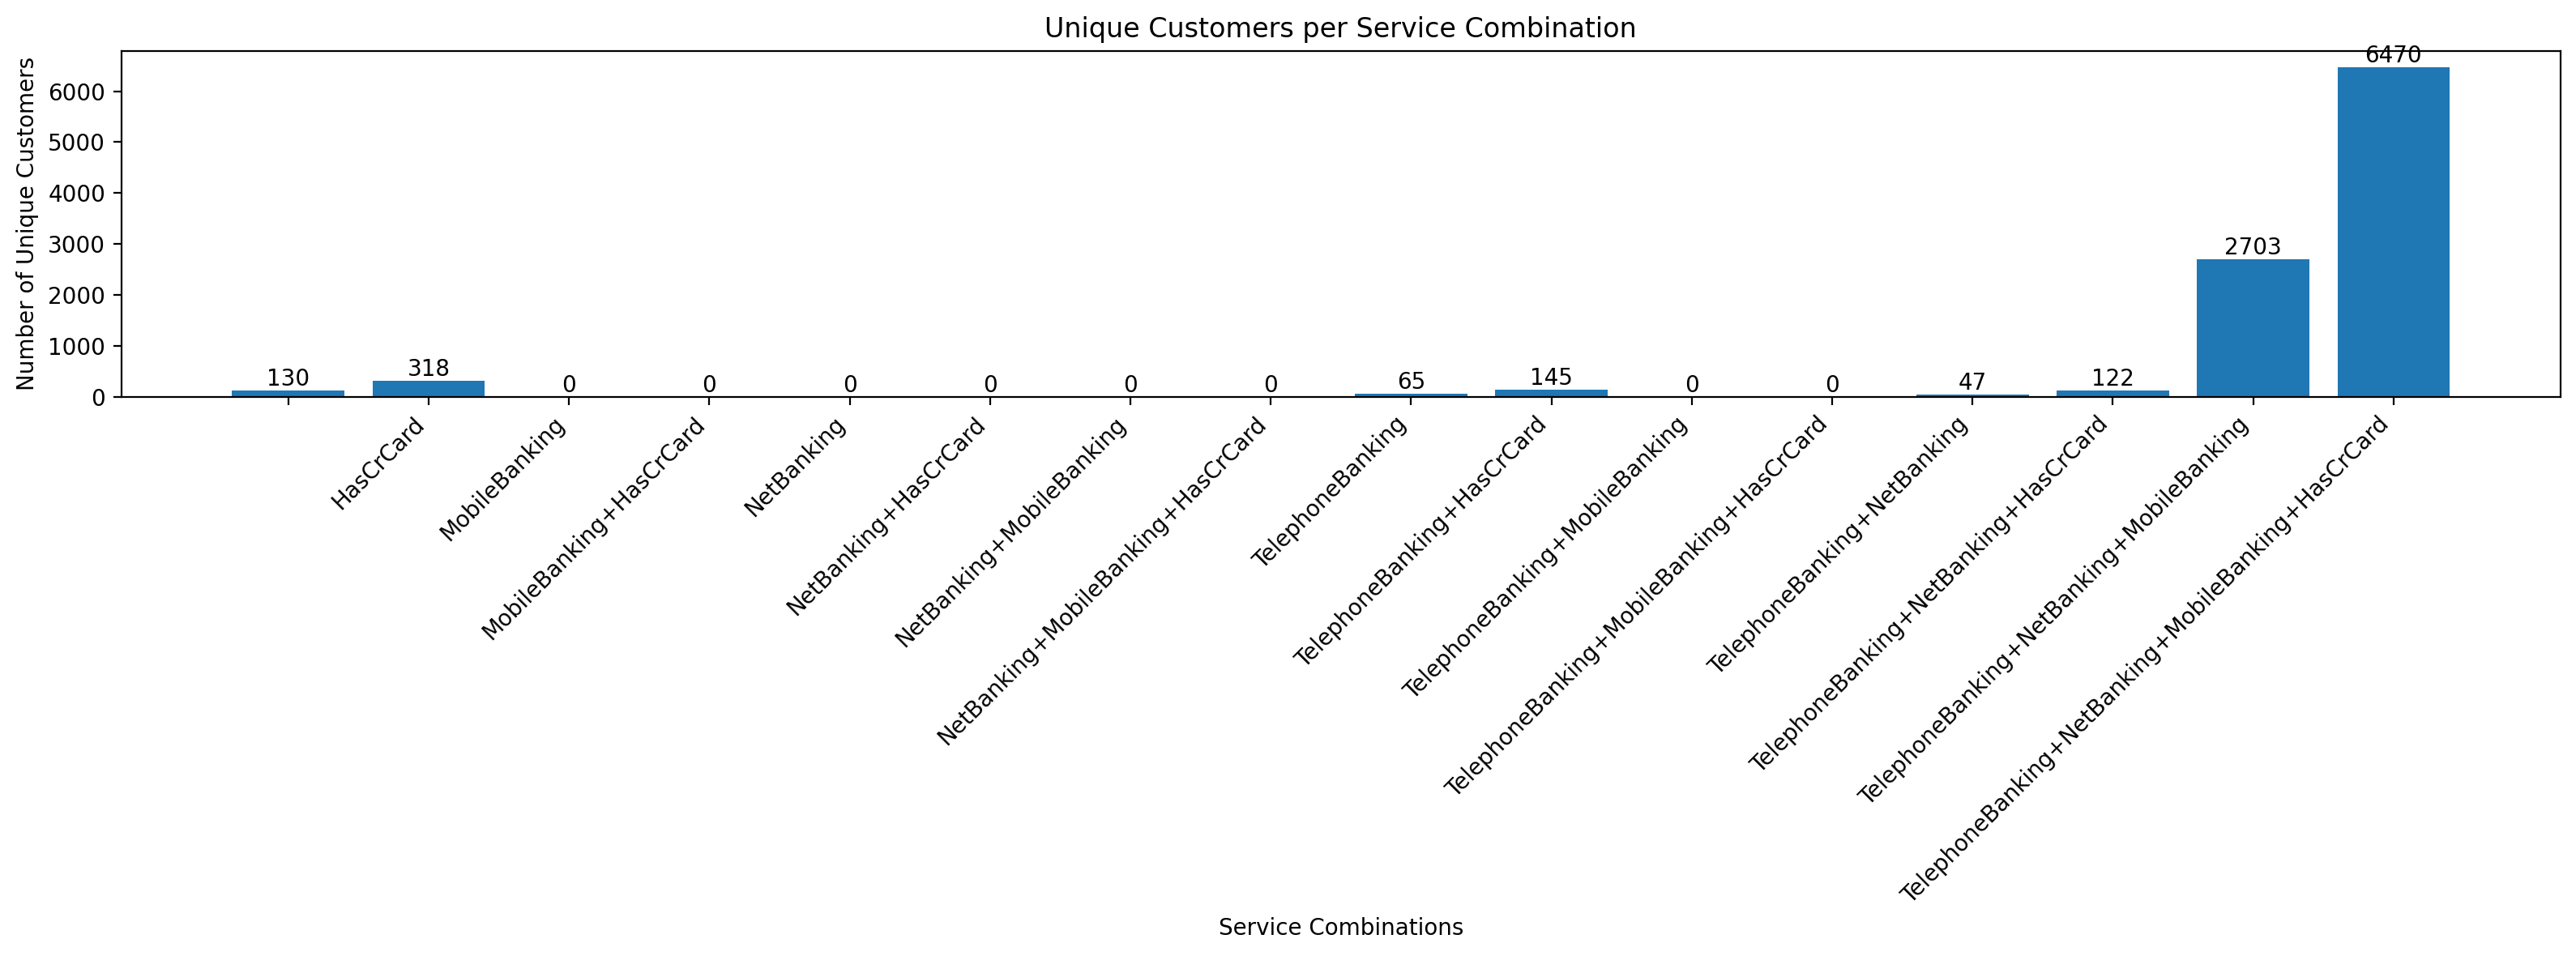

In [ ]:
# prompt: This bank provides 4 services: 'TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard'
# make a bar chart that shows the unique customers utilizing all combinations of the above services
# ticks on the x axis should be: TelephoneBanking, TelephoneBanking+NetBanking, etc

from matplotlib.pyplot import figure

# Assuming 'bank' DataFrame is already loaded and preprocessed as in the previous example.

services = ['TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard']
unique_combinations = []
counts = []
for i in range(16):  # Iterate through all possible combinations (2^4 = 16)
    combination_str = ""
    combination = bin(i)[2:].zfill(4) # Convert integer to 4-bit binary
    count = 0

    for j in range(len(services)):
      if combination[j]=='1':
        combination_str+=services[j] +"+"

    if combination_str:
      combination_str=combination_str[:-1]

    df = bank
    for j in range(len(services)):
      if combination[j] == '1':
        df = df[df[services[j]] == 'Yes']
      else:
        df = df[df[services[j]] == 'No']

    count = df['CustomerId'].nunique()
    unique_combinations.append(combination_str)
    counts.append(count)

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(unique_combinations, counts)
ax.set_xlabel("Service Combinations")
ax.set_ylabel("Number of Unique Customers")
ax.set_title("Unique Customers per Service Combination")
plt.xticks(rotation=45, ha="right")

# Add total customer count on top of each bar
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

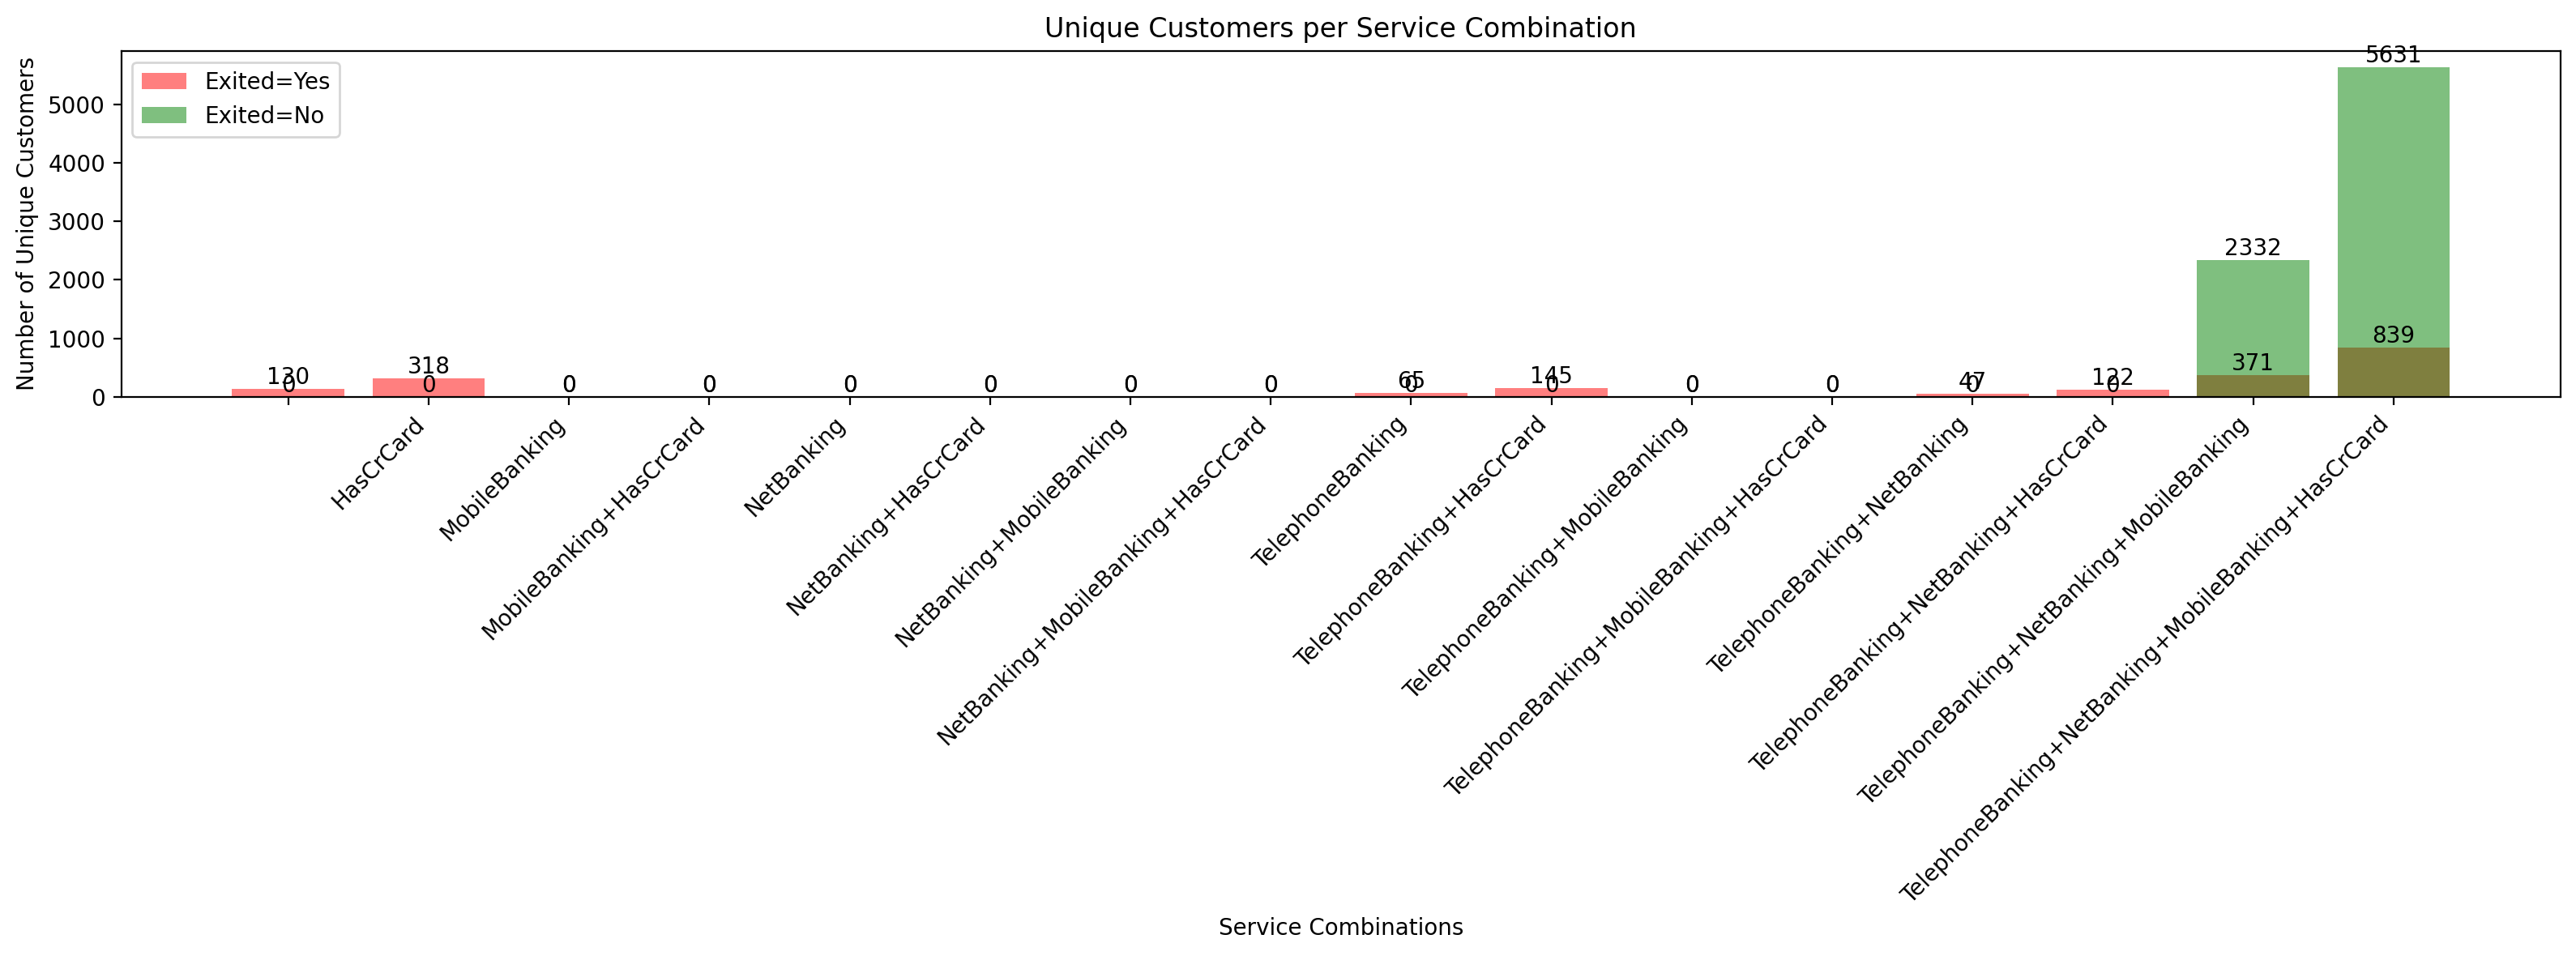

In [ ]:
# prompt: This bank provides 4 services: 'TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard'
# make a bar chart that shows the unique customers utilizing all combinations of the above services
# ticks on the x axis should be: TelephoneBanking, TelephoneBanking+NetBanking, etc

from matplotlib.pyplot import figure

# Assuming 'bank' DataFrame is already loaded and preprocessed as in the previous example.

exit = bank.loc[bank.Exited=='Yes', :]
no_exit = bank.loc[bank.Exited=='No', :]

services = ['TelephoneBanking', 'NetBanking', 'MobileBanking', 'HasCrCard']

exit_unique_combinations = []
exit_counts = []

for i in range(16):  # Iterate through all possible combinations (2^4 = 16)
    combination_str = ""
    combination = bin(i)[2:].zfill(4) # Convert integer to 4-bit binary
    count = 0

    for j in range(len(services)):
      if combination[j]=='1':
        combination_str+=services[j] +"+"

    if combination_str:
      combination_str=combination_str[:-1]

    df = exit
    for j in range(len(services)):
      if combination[j] == '1':
        df = df[df[services[j]] == 'Yes']
      else:
        df = df[df[services[j]] == 'No']

    count = df['CustomerId'].nunique()
    exit_unique_combinations.append(combination_str)
    exit_counts.append(count)

no_exit_unique_combinations = []
no_exit_counts = []

for i in range(16):  # Iterate through all possible combinations (2^4 = 16)
    combination_str = ""
    combination = bin(i)[2:].zfill(4) # Convert integer to 4-bit binary
    count = 0

    for j in range(len(services)):
      if combination[j]=='1':
        combination_str+=services[j] +"+"

    if combination_str:
      combination_str=combination_str[:-1]

    df = no_exit
    for j in range(len(services)):
      if combination[j] == '1':
        df = df[df[services[j]] == 'Yes']
      else:
        df = df[df[services[j]] == 'No']

    count = df['CustomerId'].nunique()
    no_exit_unique_combinations.append(combination_str)
    no_exit_counts.append(count)

fig, ax = plt.subplots(figsize=(16, 6))
exit_bars = ax.bar(exit_unique_combinations, exit_counts, color='r', alpha=0.5, label='Exited=Yes')
no_exit_bars = ax.bar(no_exit_unique_combinations, no_exit_counts, color='g', alpha=0.5, label='Exited=No')

ax.set_xlabel("Service Combinations")
ax.set_ylabel("Number of Unique Customers")
ax.set_title("Unique Customers per Service Combination")
ax.legend()
plt.xticks(rotation=45, ha="right")

# Add total customer count on top of each bar
for bar, count in zip(exit_bars, exit_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Add total customer count on top of each bar
for bar, count in zip(no_exit_bars, no_exit_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: convert the state names to their official shortened version in upper case and then create a chart overlaid on a US map that shows the customers by shortened State names

import plotly.express as px

# State name mappings (expand this dictionary as needed)
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
    # Add more states and their abbreviations as needed
}

bank['ST'] = bank['State'].map(state_abbreviations)

customer_counts = bank.groupby('ST')['CustomerId'].count().reset_index()
customer_counts.rename(columns={'CustomerId':'Customer_count'}, inplace=True)

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='Customer_count',
                    hover_name="ST",
                    title='Customers by State')
fig.show()



In [ ]:
bank.loc[bank.State=='Wyoming']

RowNumber  CustomerId Surname        Country      City    State ZipCode  \
6034       6035    15601045  Angelo  United States  Cheyenne  Wyoming   82001   

     Region Gender  Age  ...  RoboAdvisor  CustomerId.2  TelephoneBanking  \
6034   West   Male   37  ...          Yes           Yes               Yes   

      NetBanking MobileBanking  HasCrCard  county_code  county_name  \
6034         Yes           Yes         No           21      Laramie   

     state_code   fips  
6034         56  56021  

[1 rows x 29 columns]

In [ ]:
customer_counts = bank.groupby('ST')['Age'].mean().reset_index()
customer_counts.rename(columns={'Age':'mean_age'}, inplace=True)

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='mean_age',
                    hover_name="ST",
                    title='Average Age by State')
fig.show()

In [ ]:
customer_counts = bank.groupby('ST')['Balance'].mean().reset_index()
customer_counts.rename(columns={'Balance':'mean_balance'}, inplace=True)

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='mean_balance',
                    hover_name="ST",
                    title='Average Balance by State')
fig.show()

In [ ]:
customer_counts = bank.groupby('ST')['EstimatedSalary'].mean().reset_index()
customer_counts.rename(columns={'EstimatedSalary':'mean_salary'}, inplace=True)

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='mean_salary',
                    hover_name="ST",
                    title='Average Salary')
fig.show()

In [ ]:
import pandas as pd

# URL of the webpage containing the table
url = "https://www.knitpeople.com/blog/average-salary-us"

# Read the HTML table into a list of dataframes
dfs = pd.read_html(url)

# Assuming the desired table is the first one on the page
df = dfs[0]

df[['State', 'Amount']].set_index('State')
df['District of Columbia'] = '$76,908'

df['State'] = df['State'].astype(str)
df = df.reset_index()

# Now you can work with the dataframe 'df'
bank = pd.merge(bank, df[['State', 'Amount']], how='left', left_on='State', right_on='State')

bank['Amount'] = bank['Amount'].astype('str').apply(lambda x: x.replace(',','').replace('$',''))
bank['SalaryMultiplier'] = bank['EstimatedSalary'] / (bank['Amount'].astype('float'))
customer_counts = bank.groupby('ST')['SalaryMultiplier'].mean().reset_index()

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='SalaryMultiplier',
                    hover_name="ST",
                    title='Average Salary Multiplier')
fig.show()

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age"

# Read the HTML table into a list of dataframes
dfs = pd.read_html(url)

# Assuming the desired table is the first one on the page
df = dfs[0]

df.columns = ['Rank', 'State', 'Median Age']
bank = pd.merge(bank, df[['State', 'Median Age']], how='left', left_on='State', right_on='State')

bank['AgeMultiplier'] = bank['Age'] / (bank['Median Age'].astype('float'))
customer_counts = bank.groupby('ST')['AgeMultiplier'].mean().reset_index()

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='AgeMultiplier',
                    hover_name="ST",
                    title='Average Age Multiplier')
fig.show()

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"

# Read the HTML table into a list of dataframes
dfs = pd.read_html(url)

# Assuming the desired table is the first one on the page
df = dfs[0]

df = df.iloc[:,:2]
df.columns = ['State', 'Population']

bank = pd.merge(bank, df, how='left', left_on='State', right_on='State')

customer_counts = bank.groupby(['ST', 'Population'])['CustomerId'].count().reset_index()

customer_counts['CustomerMultiplier'] = 100 * customer_counts['CustomerId'] / (customer_counts['Population'].astype('float'))

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='CustomerMultiplier',
                    hover_name="ST",
                    title='Number of customers as % of state population')
fig.show()

In [ ]:
bank['Exited'] = bank['Exited'].map({'Yes':1, 'No':0})
customer_counts = bank.groupby('ST')['Exited'].mean().reset_index()
customer_counts.rename(columns={'Exited':'avg_exited'}, inplace=True)

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='avg_exited',
                    hover_name="ST",
                    title='Average Churn Rate')
fig.show()

bank['Exited'] = bank['Exited'].map({1: 'Yes', 0: 'No'})

In [ ]:
bank['HasCrCard'] = bank['HasCrCard'].map({'Yes':1, 'No':0})
customer_counts = bank.groupby('ST')['HasCrCard'].mean().reset_index()
customer_counts.rename(columns={'HasCrCard':'card_proportion'}, inplace=True)

fig = px.choropleth(customer_counts, locations='ST', locationmode="USA-states", scope="usa",
                    color='card_proportion',
                    hover_name="ST",
                    title='Proportion with credit card')
fig.show()

bank['HasCrCard'] = bank['HasCrCard'].map({1: 'Yes', 0: 'No'})

In [ ]:
customer_counts.loc[(customer_counts.card_proportion>0.8)|(customer_counts.card_proportion<0.6),:]

ST  card_proportion
26  ND         0.857143
39  SD         1.000000
48  WY         0.000000

In [ ]:
import pgeocode
nomi = pgeocode.Nominatim('us')

zip_to_county_code = {}
zip_to_county_name = {}
bank['ZipCode'] = bank['ZipCode'].astype('str').str.zfill(5)
for zip in bank['ZipCode'].unique():
  try:
    cc = nomi.query_postal_code(str(zip))['county_code']
    zip_to_county_code[zip] = int(cc)
    cn = nomi.query_postal_code(str(zip))['county_name']
    zip_to_county_name[zip] = cn
  except:
    print(zip, cc, cn)
    pass

bank['county_code'] = bank['ZipCode'].map(zip_to_county_code)
bank['county_name'] = bank['ZipCode'].map(zip_to_county_name)

    # prompt: map US states to their 2-digit official numbers (state code, 06 is California)

import pandas as pd

# Assuming 'bank' DataFrame is already loaded as in the provided code

state_codes = {
    'Alabama': '01', 'Alaska': '02', 'Arizona': '04', 'Arkansas': '05',
    'California': '06', 'Colorado': '08', 'Connecticut': '09', 'Delaware': '10',
    'Florida': '12', 'Georgia': '13', 'Hawaii': '15', 'Idaho': '16',
    'Illinois': '17', 'Indiana': '18', 'Iowa': '19', 'Kansas': '20',
    'Kentucky': '21', 'Louisiana': '22', 'Maine': '23', 'Maryland': '24',
    'Massachusetts': '25', 'Michigan': '26', 'Minnesota': '27',
    'Mississippi': '28', 'Missouri': '29', 'Montana': '30', 'Nebraska': '31',
    'Nevada': '32', 'New Hampshire': '33', 'New Jersey': '34',
    'New Mexico': '35', 'New York': '36', 'North Carolina': '37',
    'North Dakota': '38', 'Ohio': '39', 'Oklahoma': '40', 'Oregon': '41',
    'Pennsylvania': '42', 'Rhode Island': '44', 'South Carolina': '45',
    'South Dakota': '46', 'Tennessee': '47', 'Texas': '48', 'Utah': '49',
    'Vermont': '50', 'Virginia': '51', 'Washington': '53',
    'West Virginia': '54', 'Wisconsin': '55', 'Wyoming': '56',
    'District of Columbia': '11'
}

# Example usage: create a new 'state_code' column in the DataFrame
#  (assuming your DataFrame has a column named 'State')
if 'State' in bank.columns:
  bank['state_code'] = bank['State'].map(state_codes)

bank['fips'] = bank['state_code'] + bank['county_code'].astype(str).str.zfill(3)

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px

customer_counts = bank.groupby('fips').aggregate({'CustomerId':'count', 'county_name':'first'}).reset_index()
customer_counts.rename(columns={'CustomerId':'Customer_count'}, inplace=True)


fig = px.choropleth(customer_counts, geojson=counties, locations='fips', color='Customer_count',
                           color_continuous_scale="Viridis",
                           scope="usa",
                           hover_name = 'county_name',
                           title='Number of customers by County'
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(title='Number of customers by County')

In [ ]:
customer_counts.sort_values(by='Customer_count', ascending=False).head(10)

fips  Customer_count                       county_name
227  36061             916                          New York
26   06037             856                       Los Angeles
286  42101             537                      Philadelphia
34   06075             511  City and County of San Francisco
360  53033             460                              King
322  48201             398                            Harris
96   17031             347                              Cook
316  48113             195                            Dallas
33   06073             193                         San Diego
9    04013             183                          Maricopa

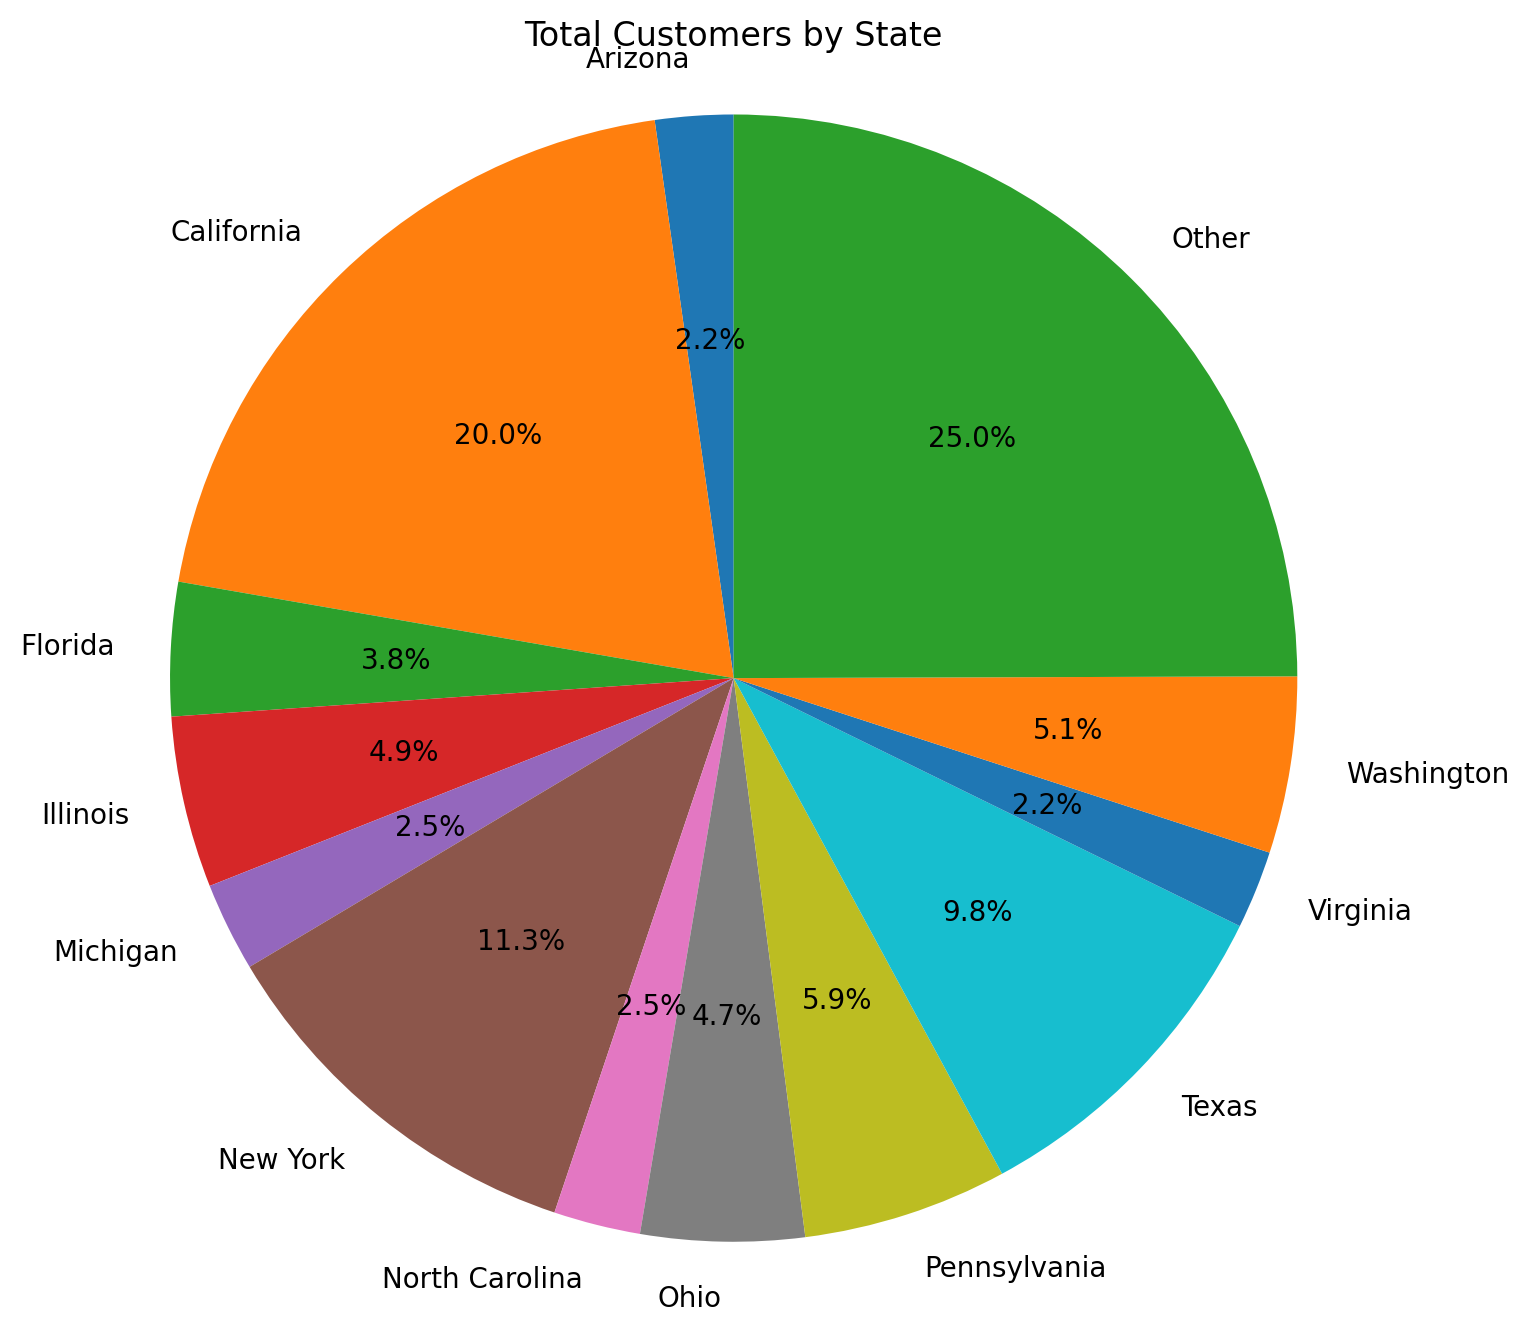

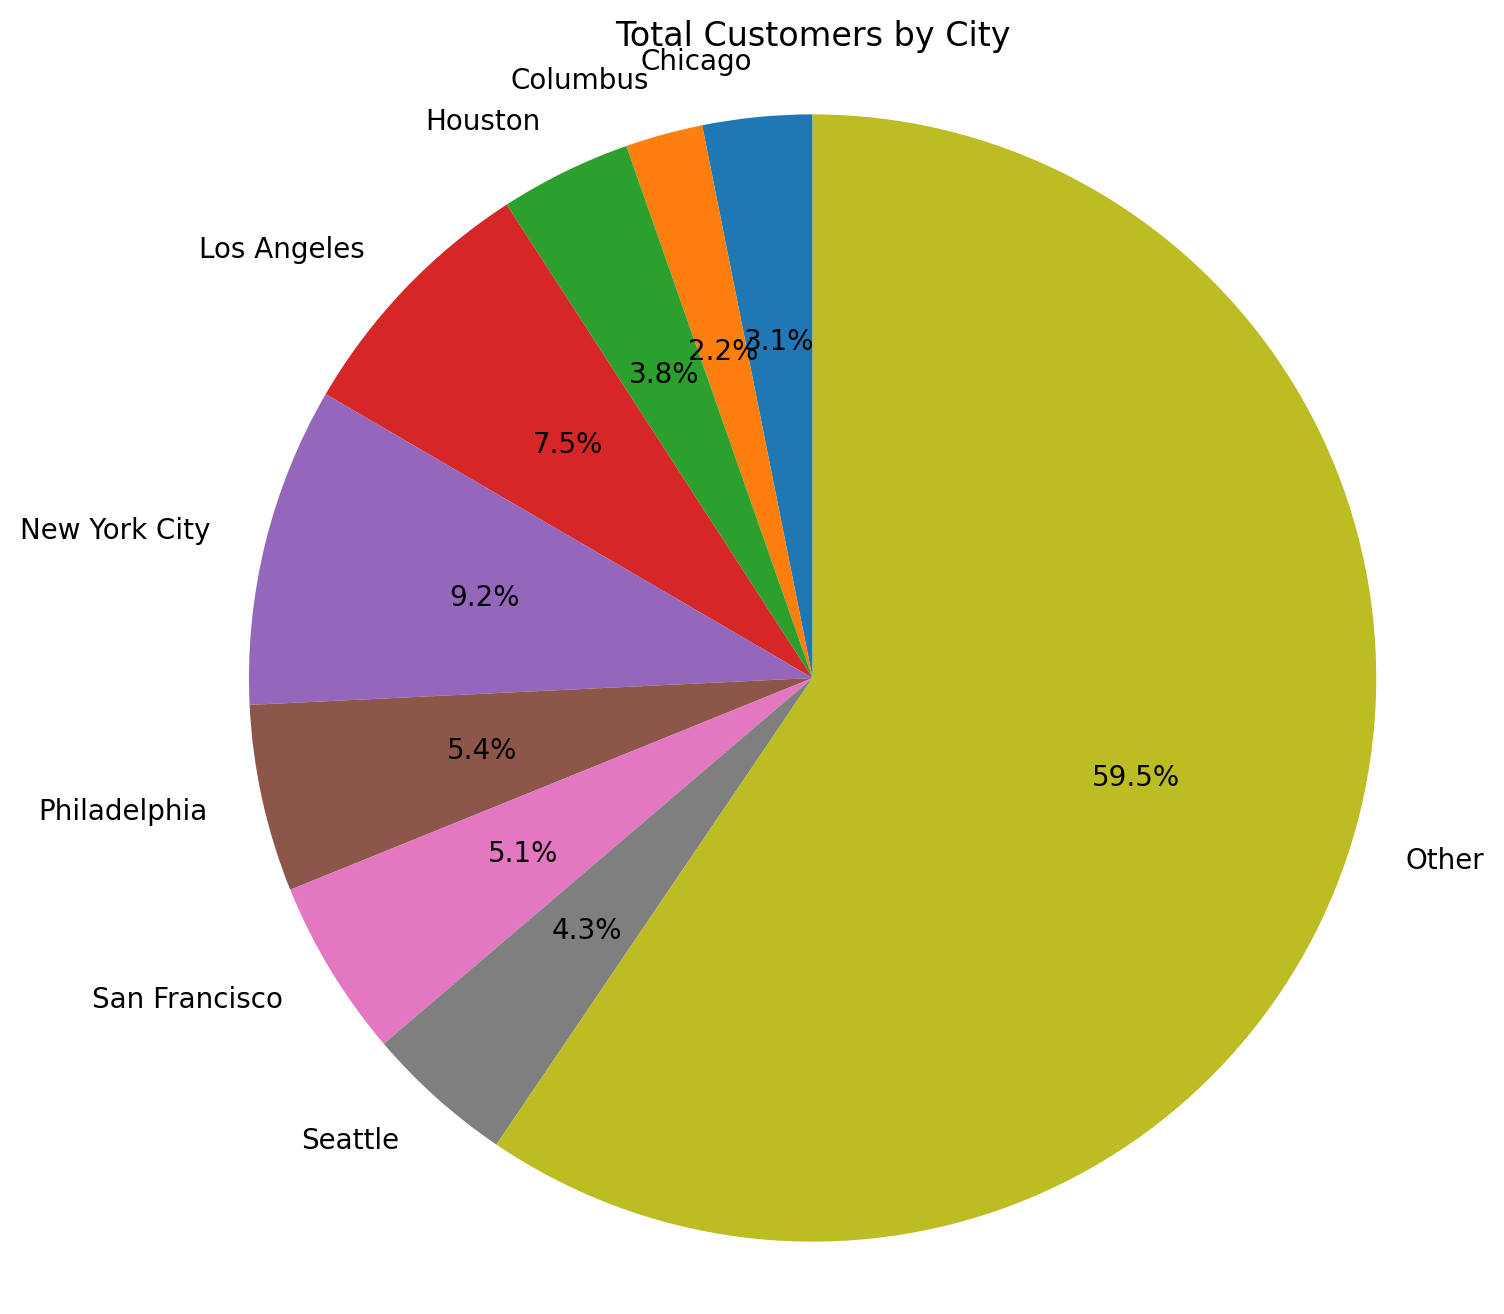

In [ ]:
# Calculate total profit by state
customers_by_state = bank.groupby('State')['CustomerId'].count()

# Calculate total profit by product subcategory
customers_by_city = bank.groupby('City')['CustomerId'].count()


# Function to create pie chart with "Other" category for smaller contributions
def create_pie_chart(data, title, threshold):
    total_profit = data.sum()
    labels = []
    sizes = []
    other_size = 0

    for label, size in data.items():
        percentage = size / total_profit
        if percentage >= threshold:
            labels.append(label)
            sizes.append(size)
        else:
            other_size += size

    if other_size > 0:
        labels.append("Other")
        sizes.append(other_size)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create pie charts for state and product subcategory
create_pie_chart(customers_by_state, "Total Customers by State", 0.02)
create_pie_chart(customers_by_city, "Total Customers by City", 0.02)

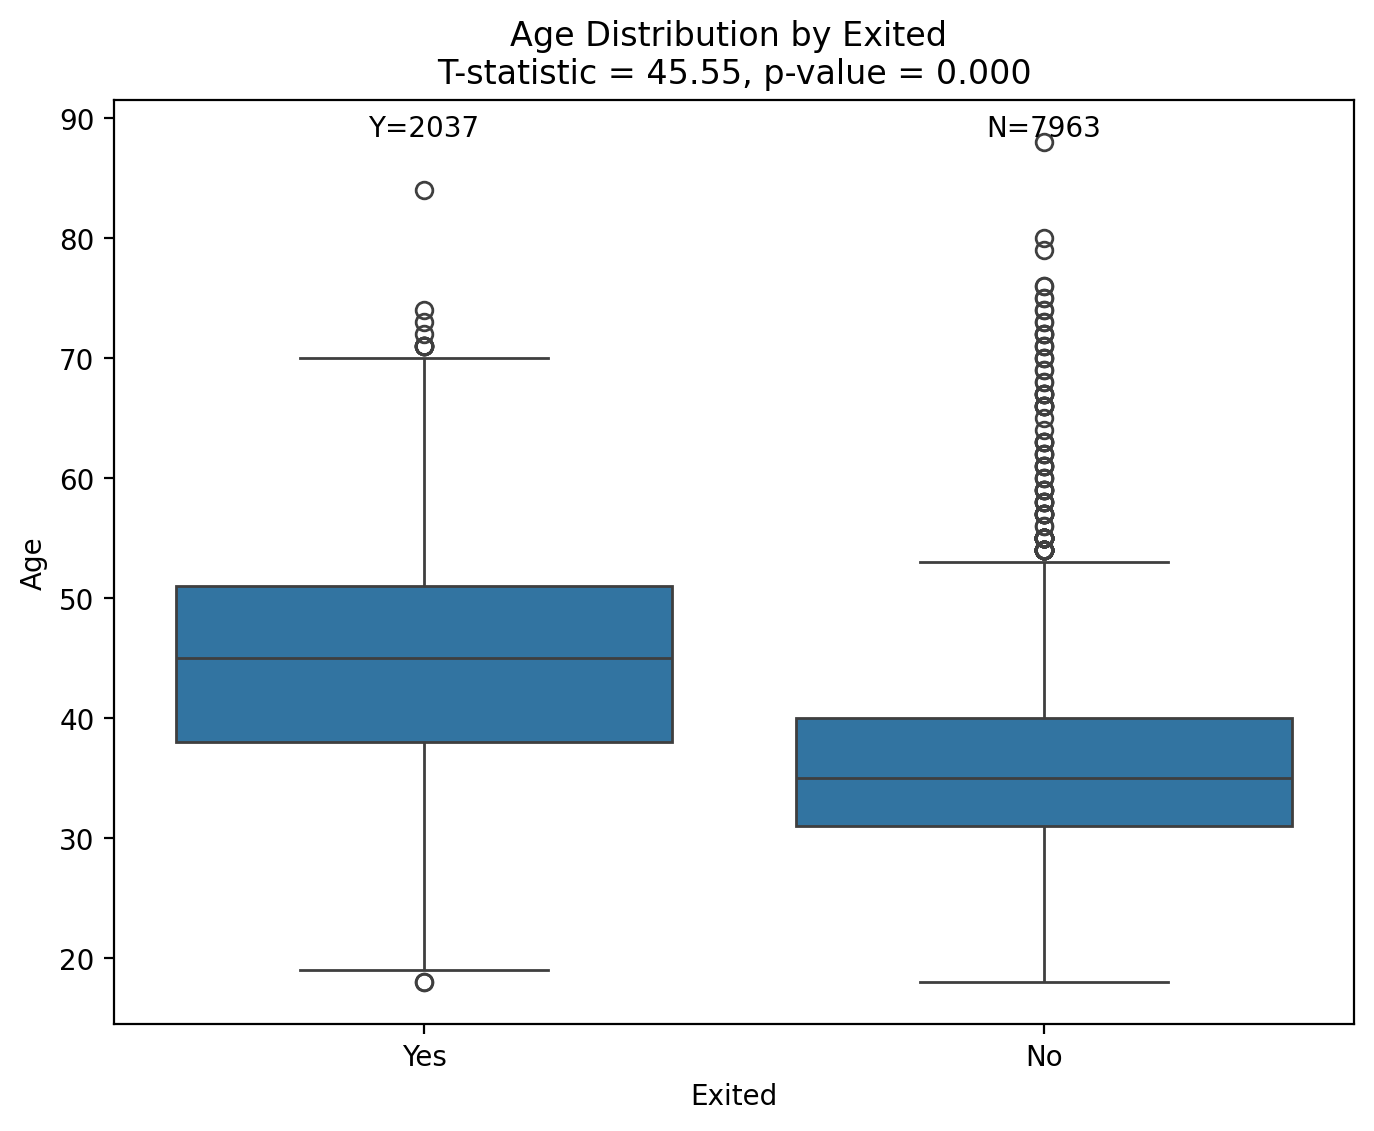

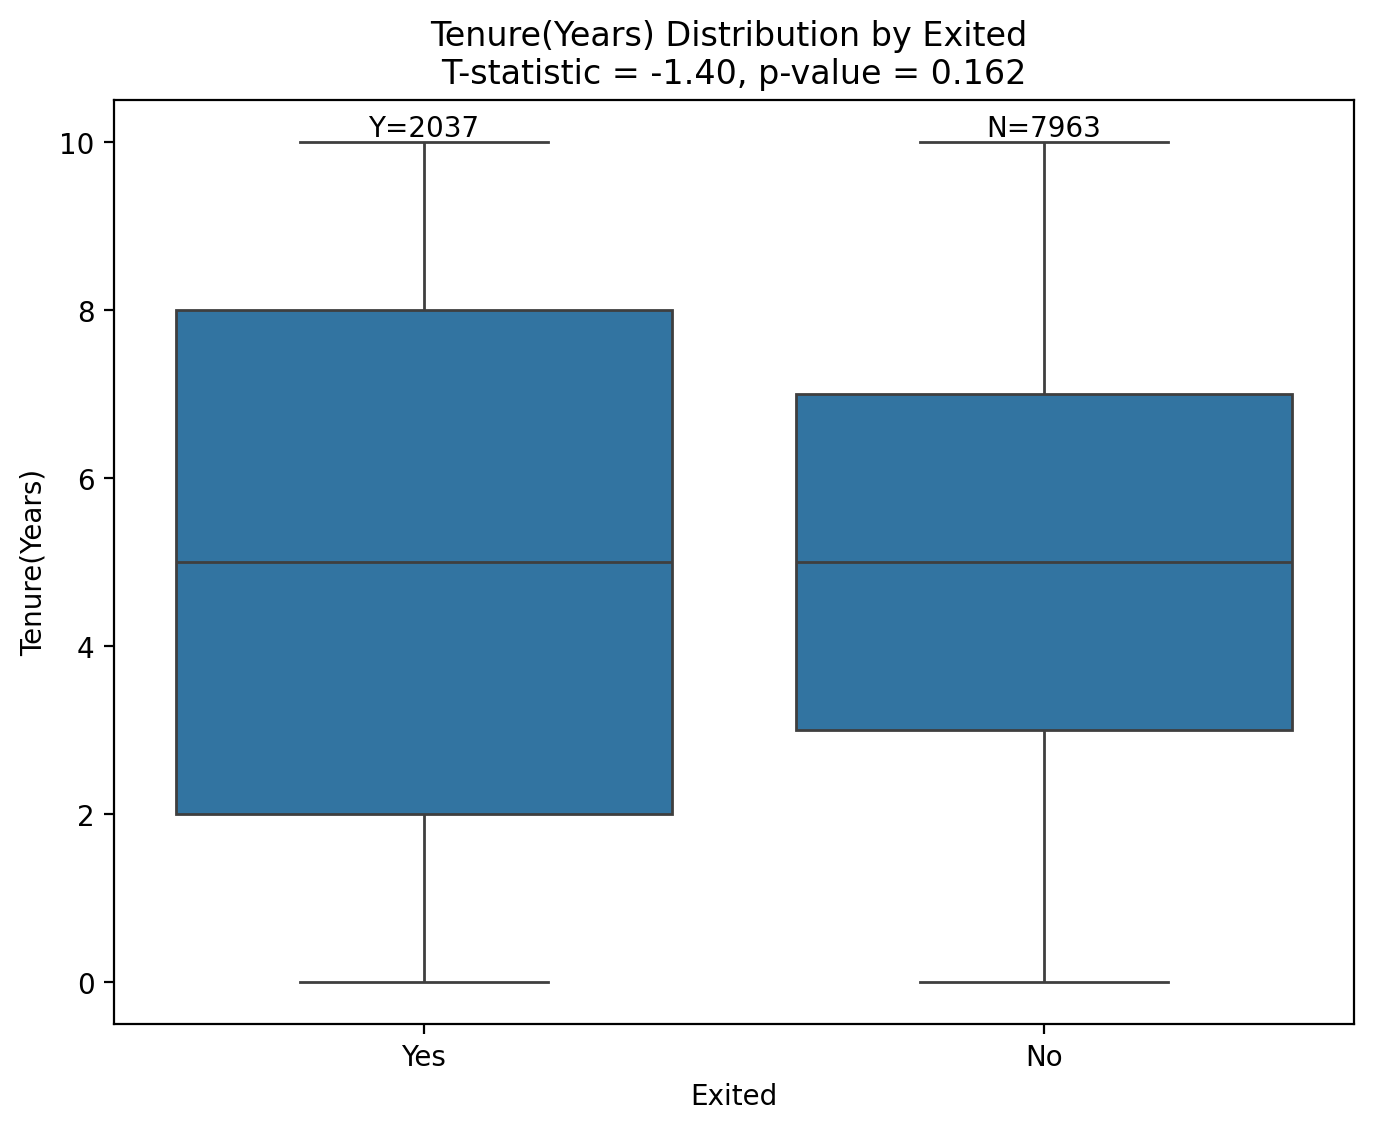

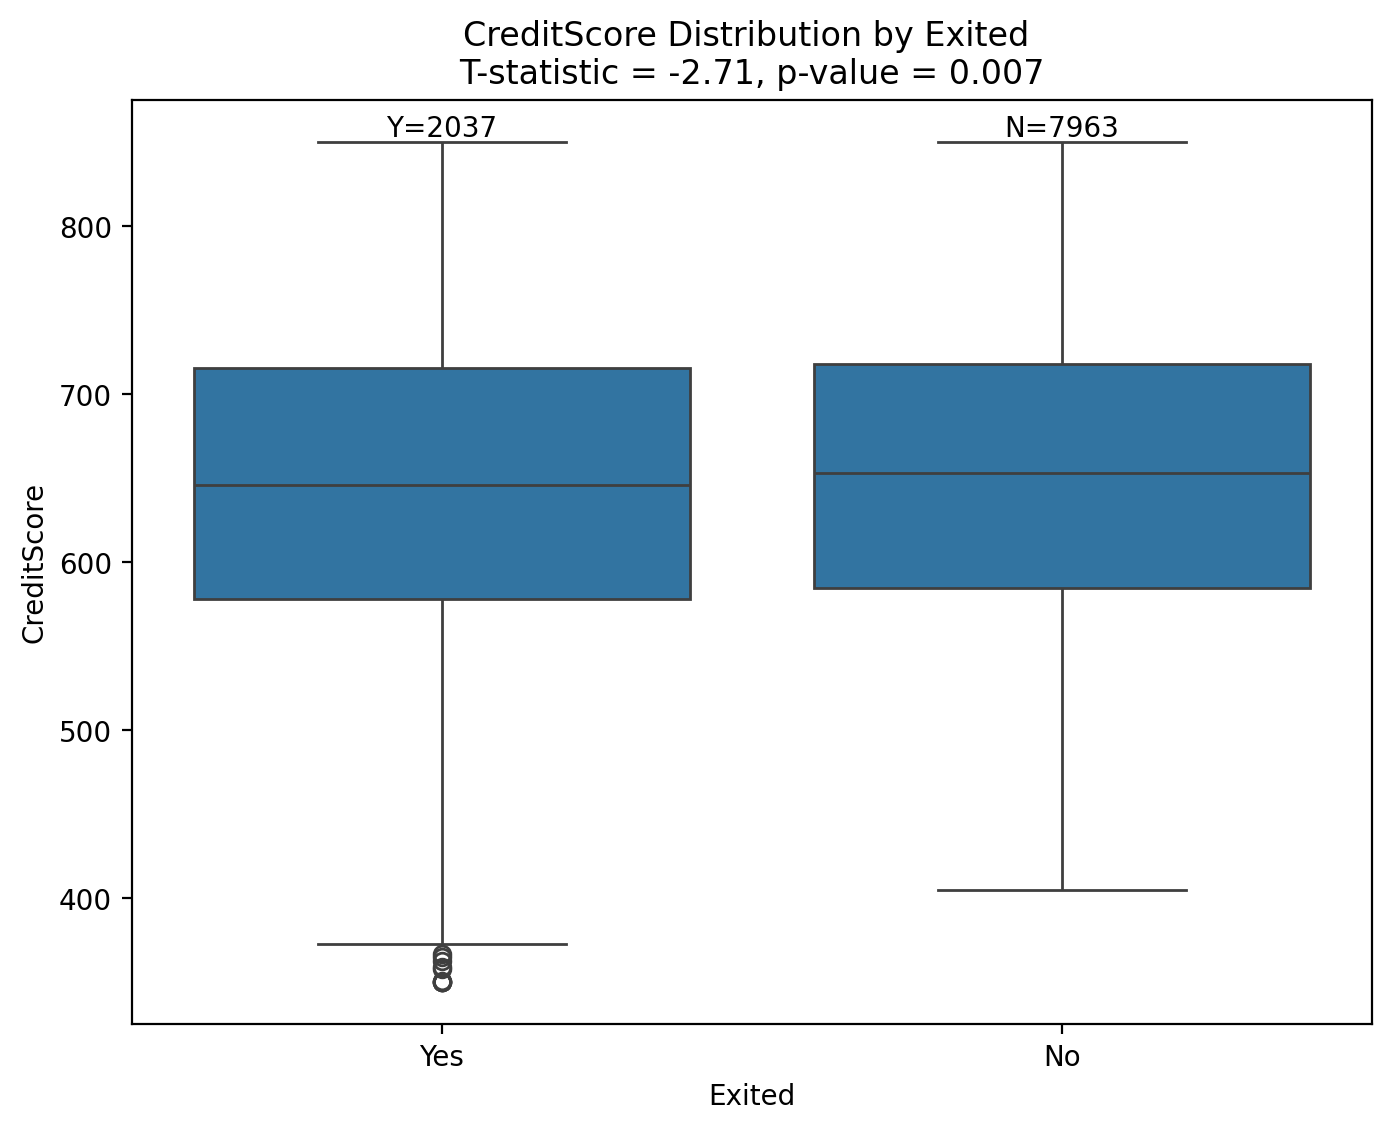

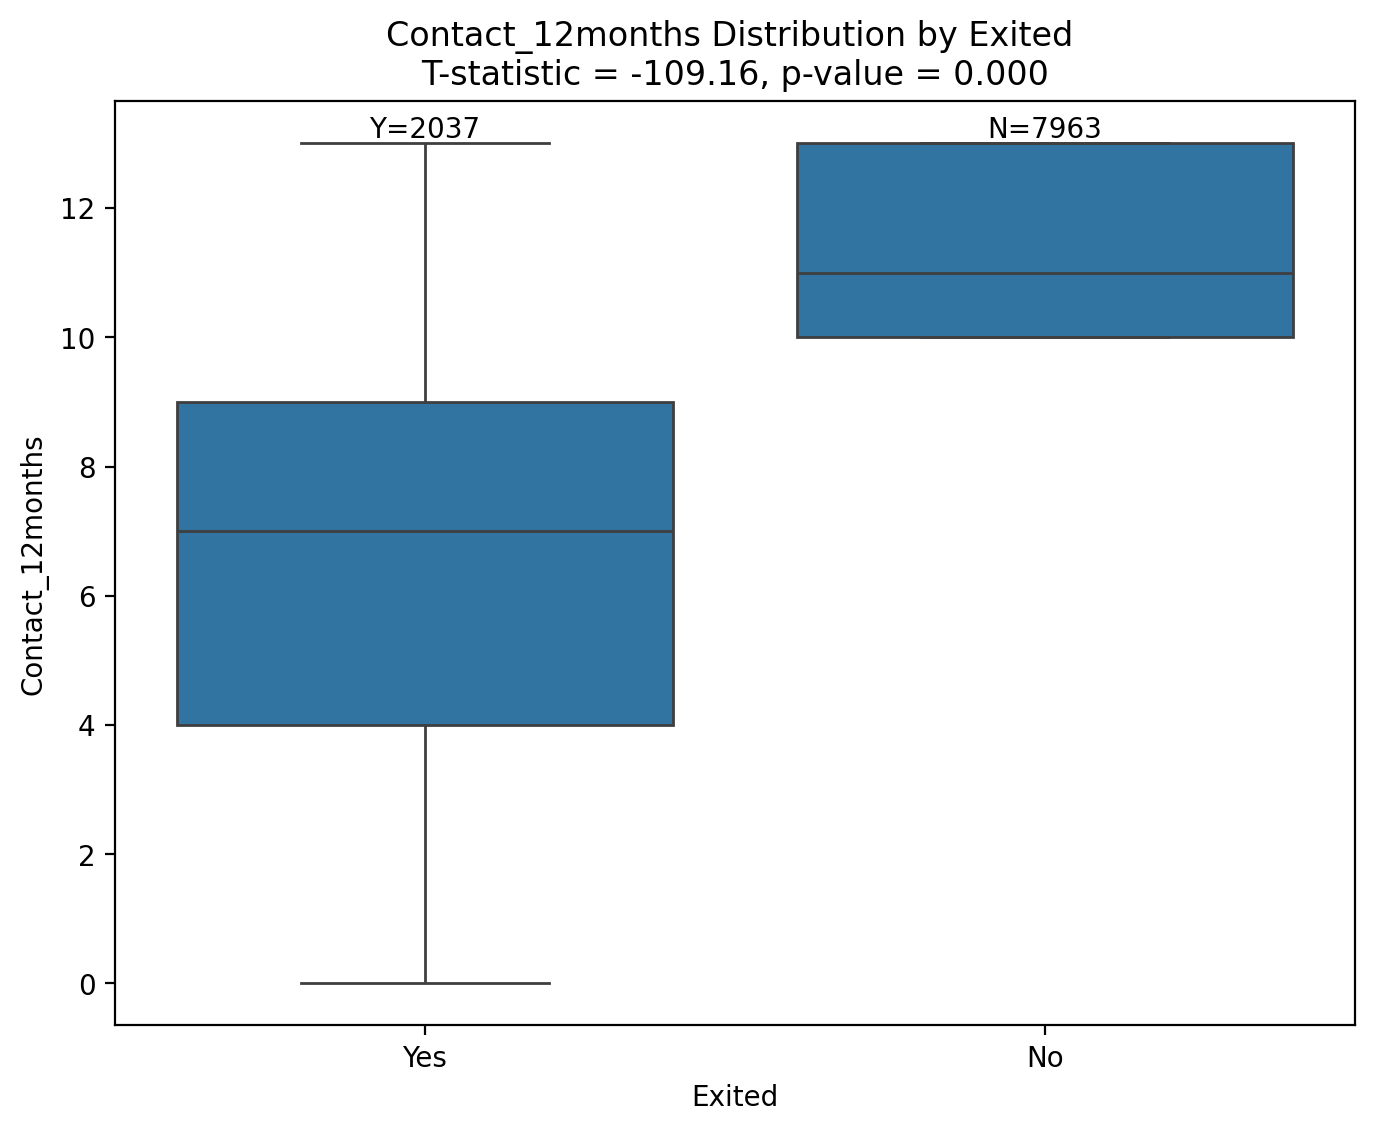

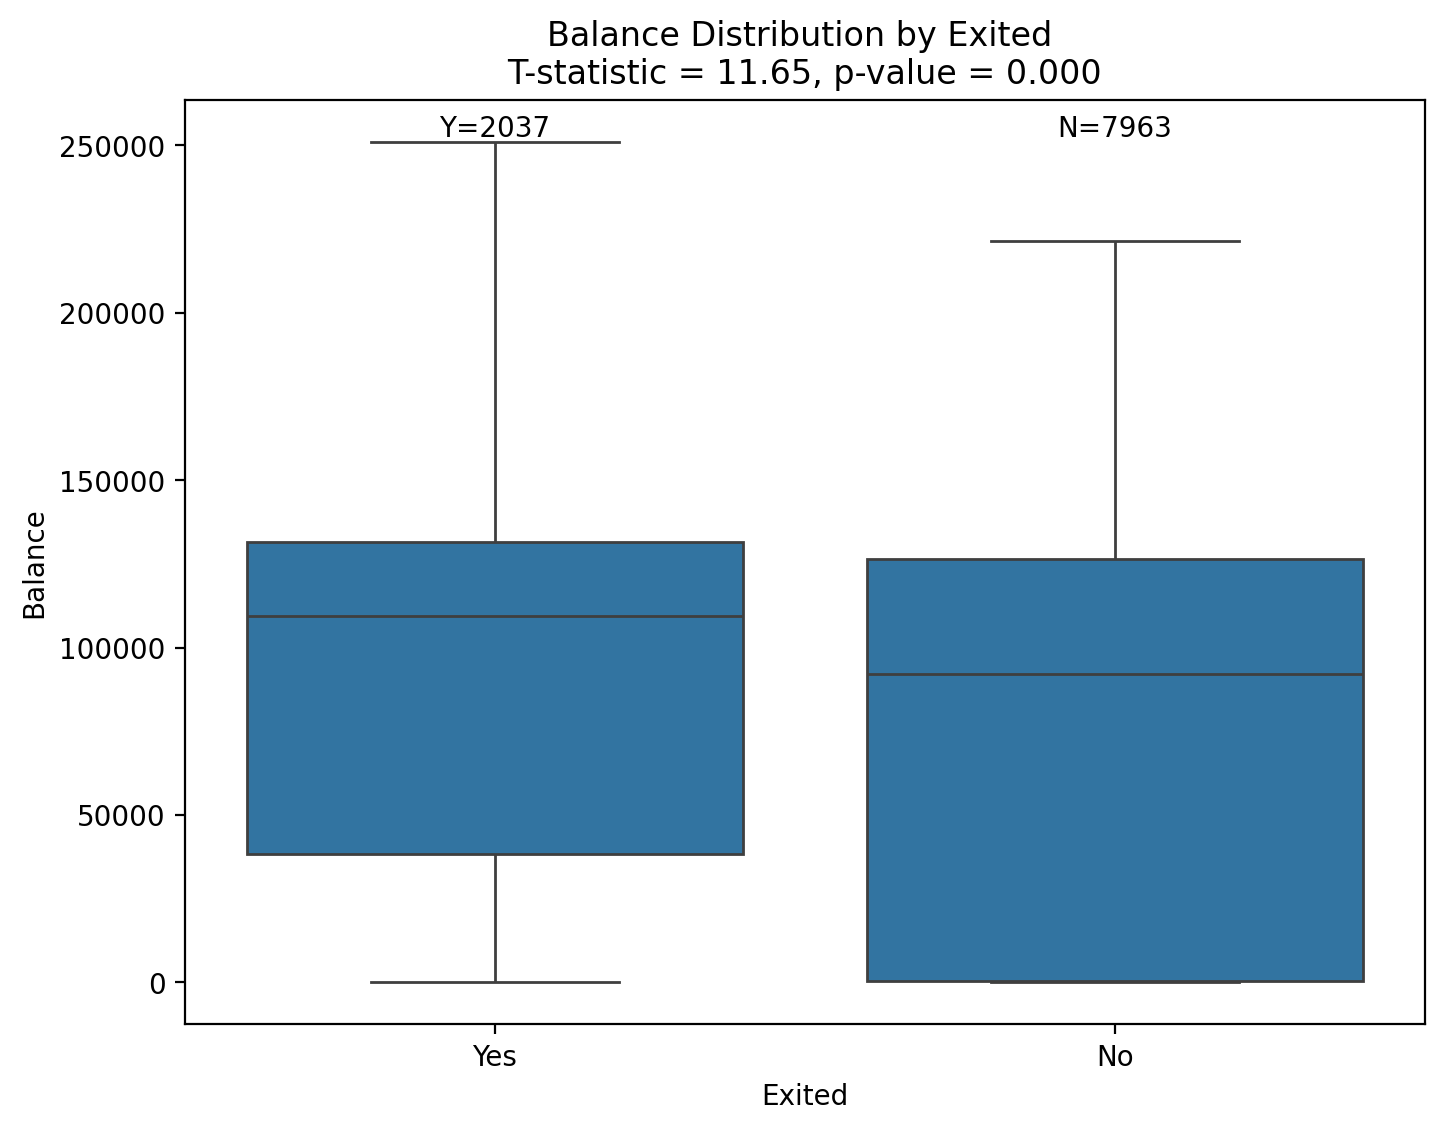

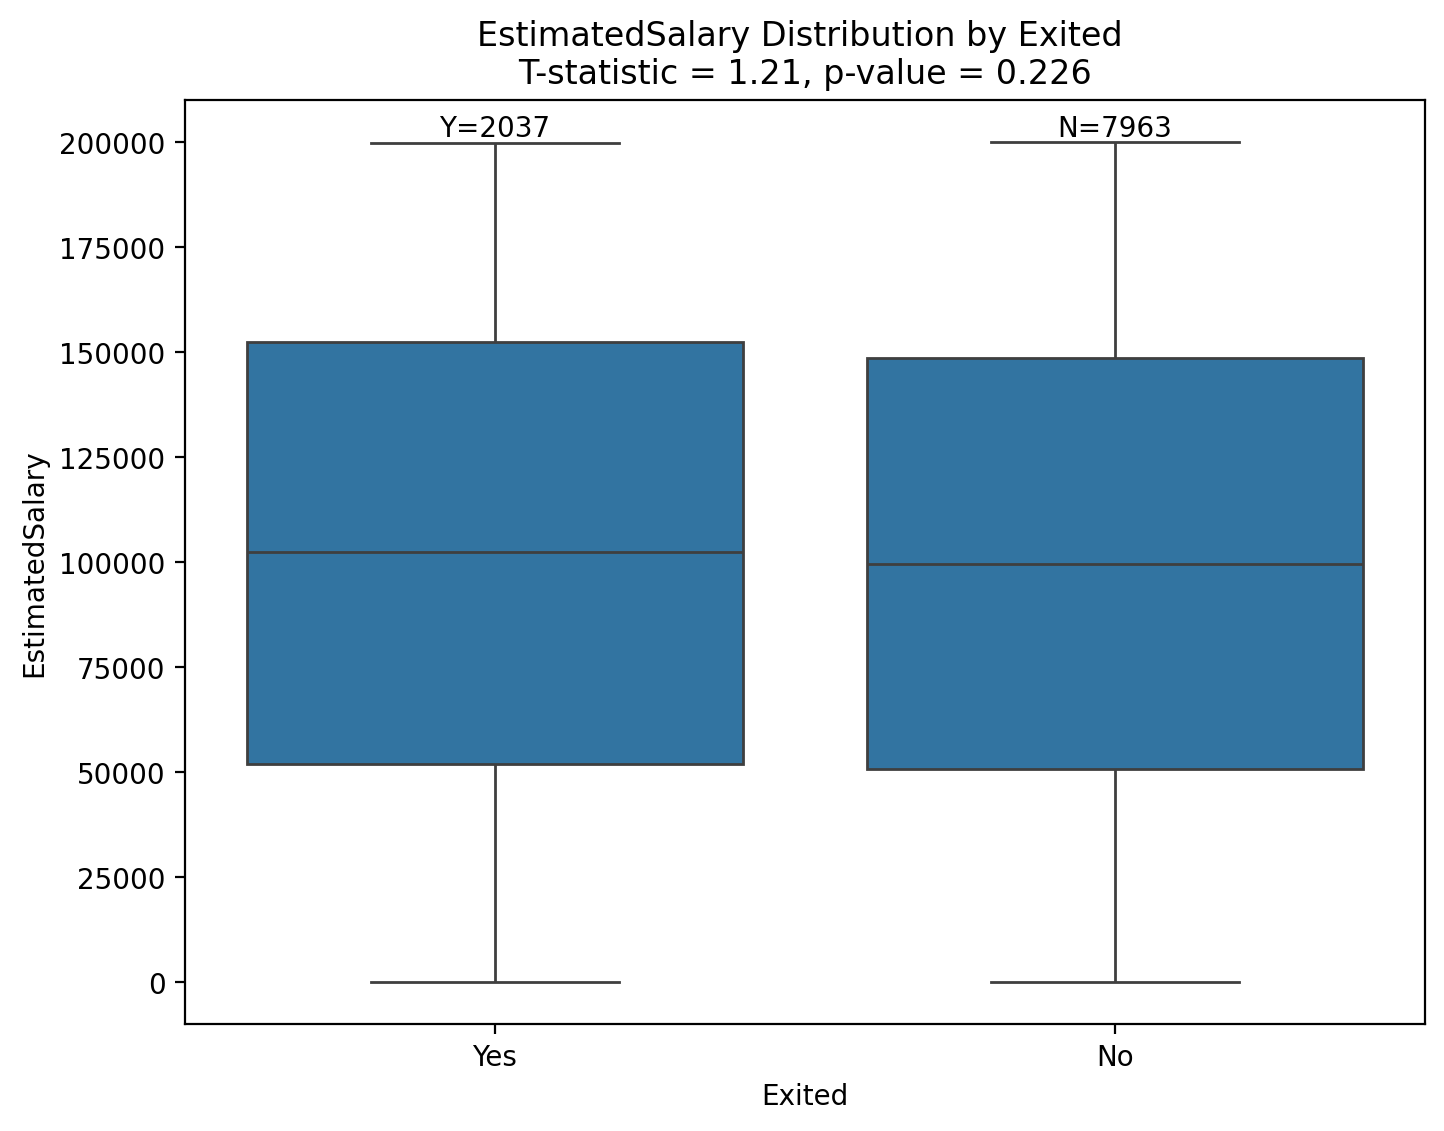

In [ ]:
plot_boxplot_with_counts('Exited', 'Age')
plot_boxplot_with_counts('Exited', 'Tenure(Years)')
plot_boxplot_with_counts('Exited', 'CreditScore')
plot_boxplot_with_counts('Exited', 'Contact_12months')
plot_boxplot_with_counts('Exited', 'Balance')
plot_boxplot_with_counts('Exited', 'EstimatedSalary')

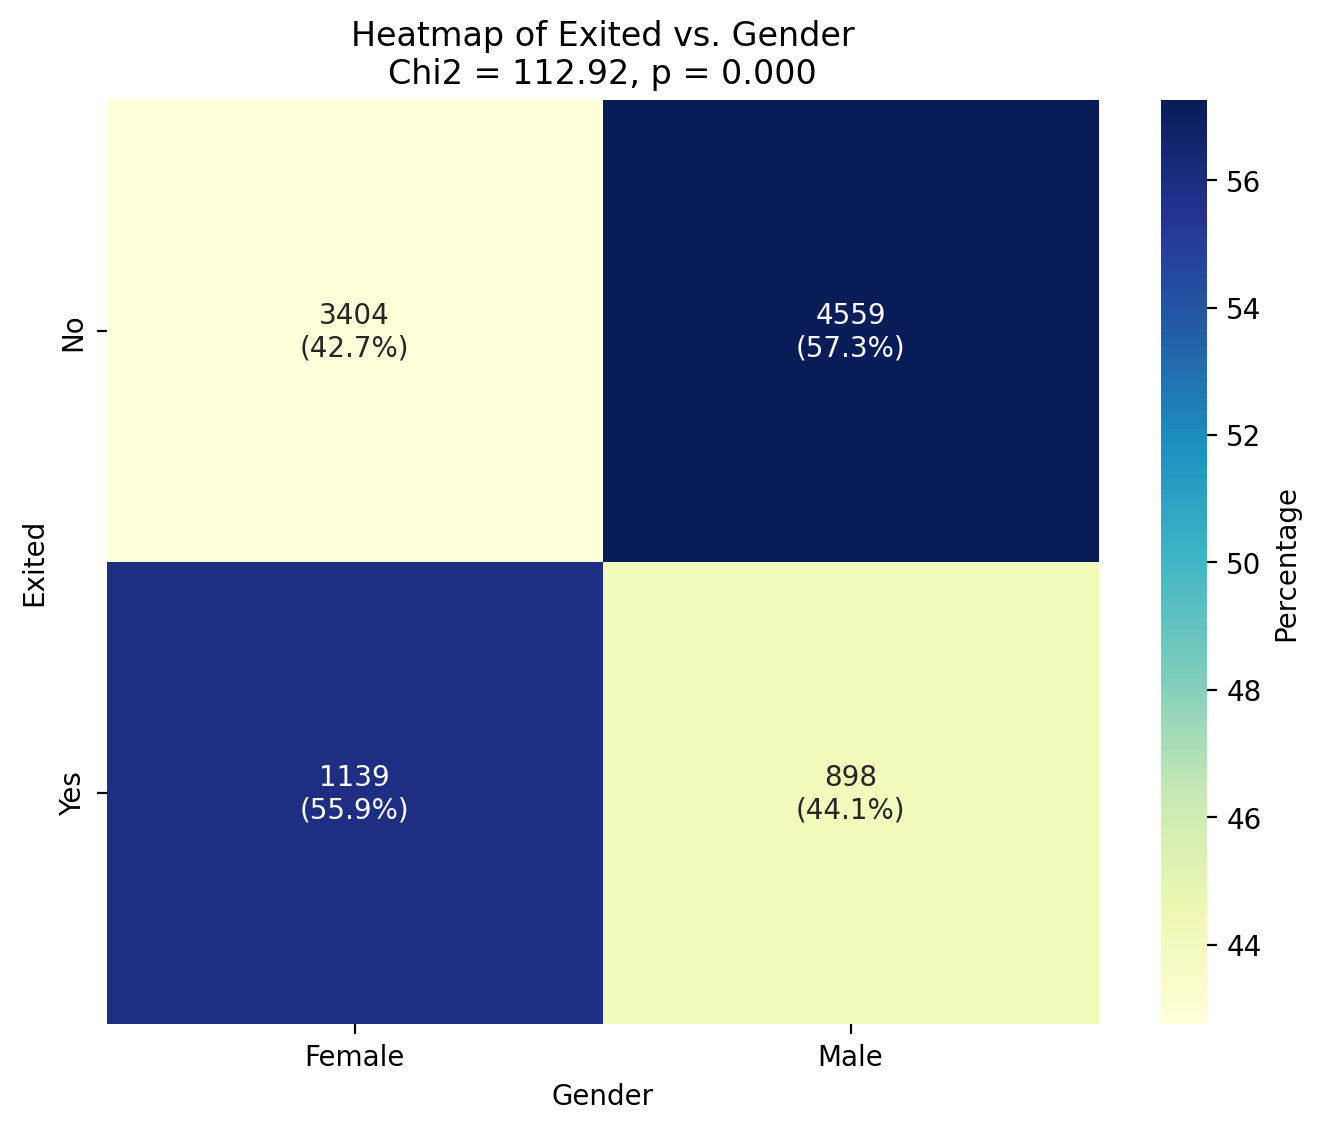

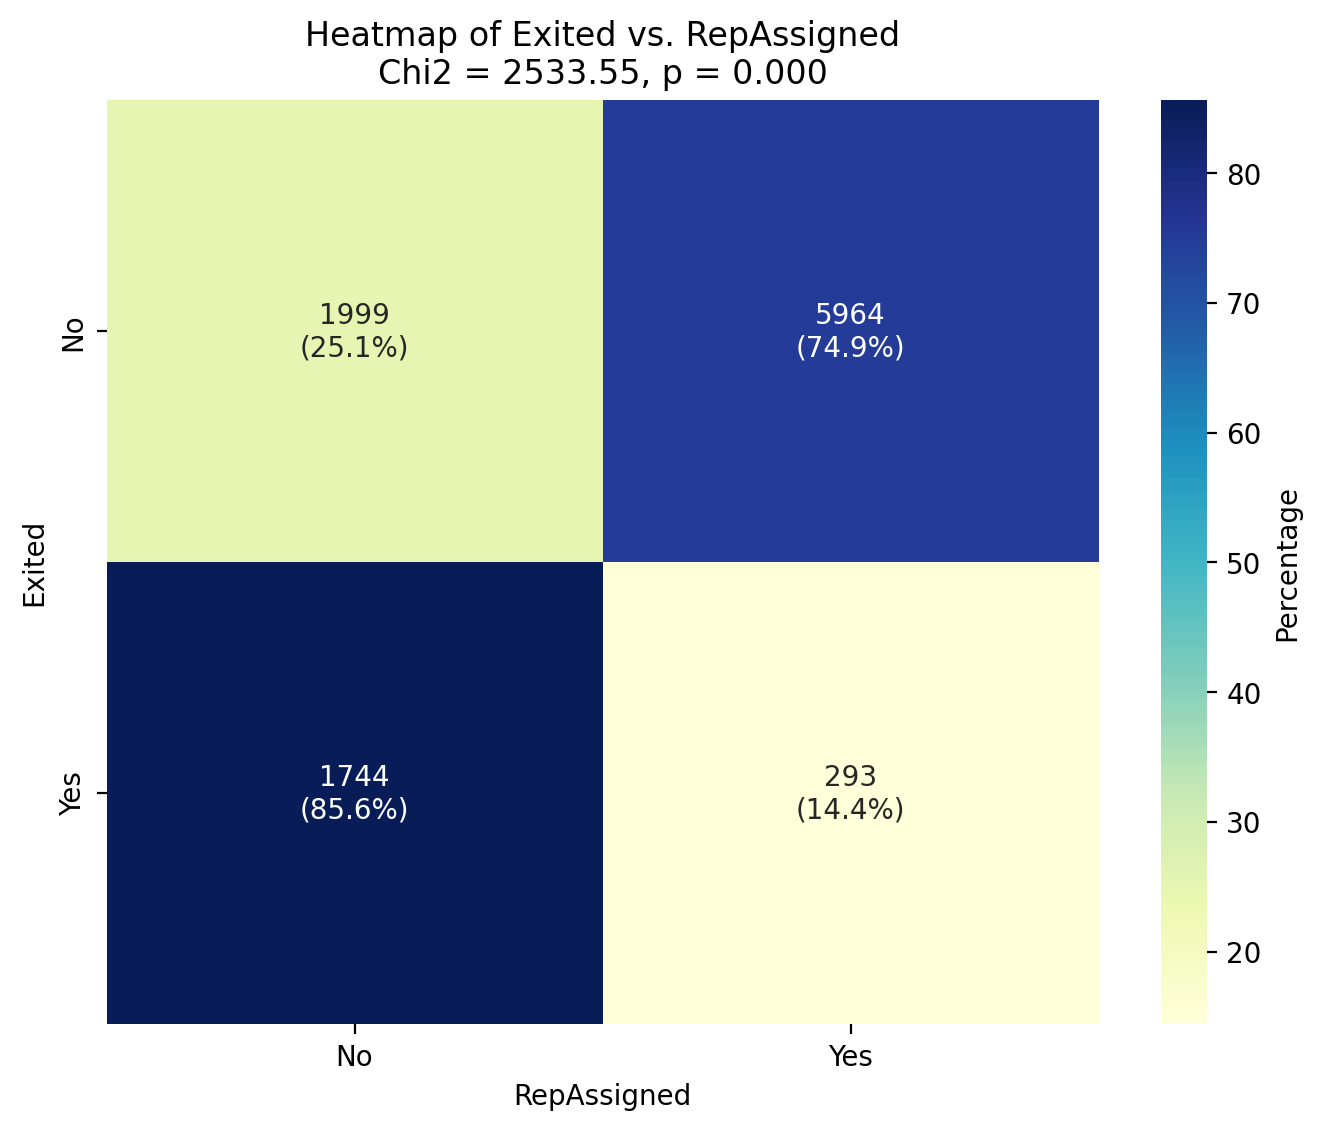

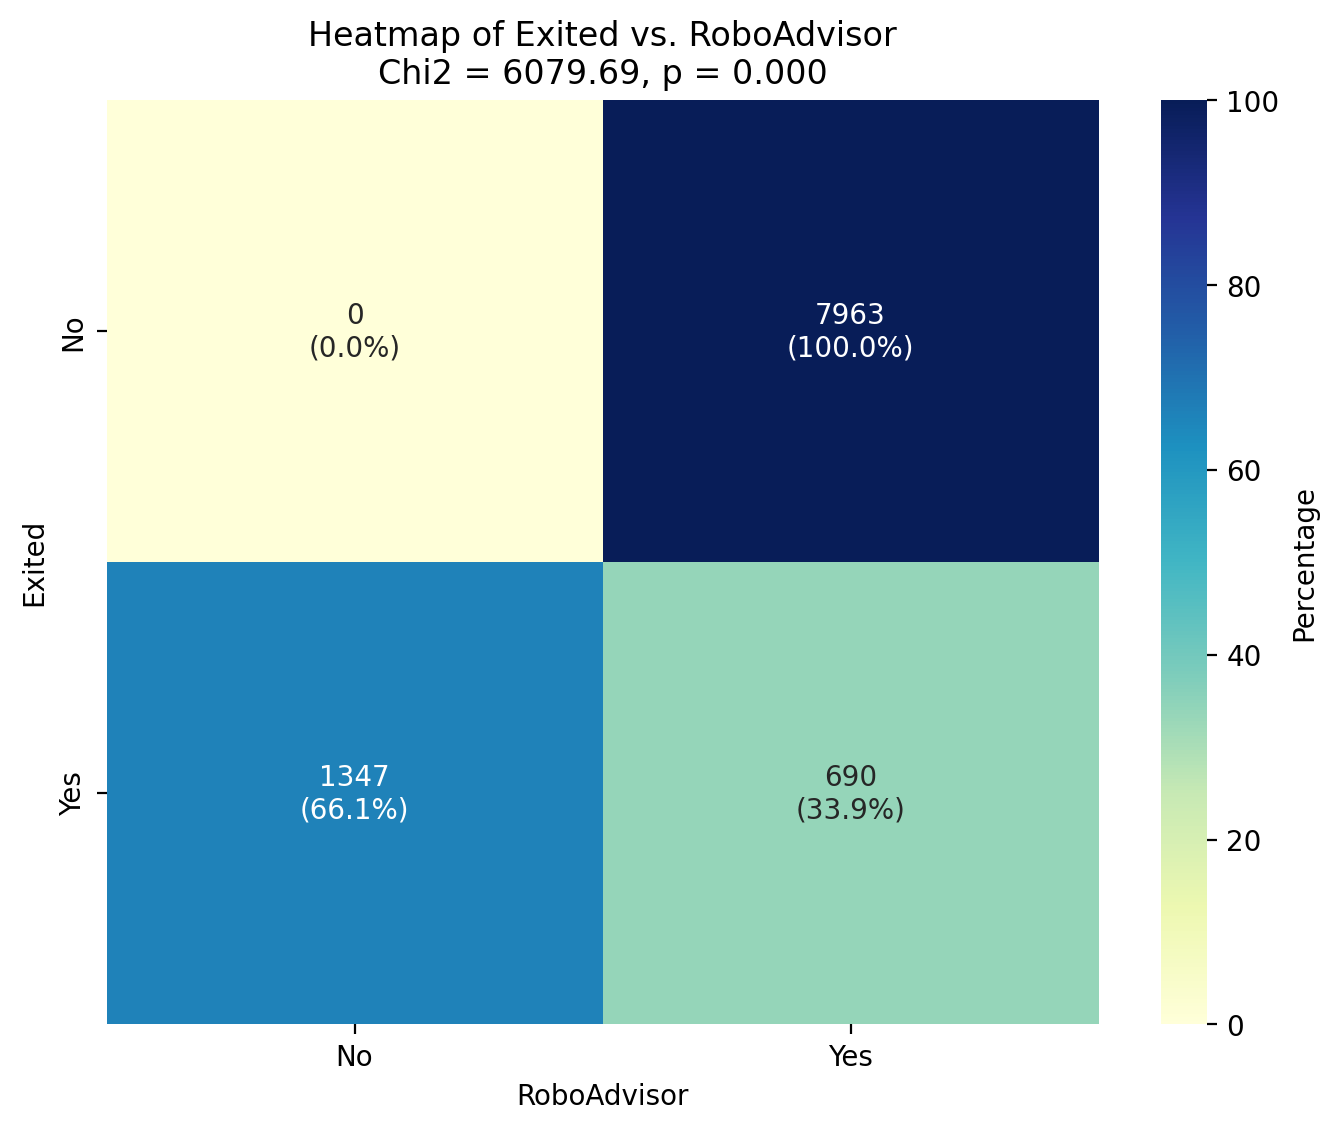

In [ ]:
binary_variables = ['Gender', 'RepAssigned', 'RoboAdvisor']
dependent_variables = ['Exited']

for dependent in dependent_variables:
  for independent in binary_variables:
    # Create the contingency table
    contingency_table = pd.crosstab(bank[dependent], bank[independent])

    # Calculate percentages
    contingency_table_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    # Combine counts and percentages for the heatmap annotations
    annotations = contingency_table.astype(str) + '\n(' + contingency_table_percentages.round(1).astype(str) + '%)'


    # Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table_percentages, annot=annotations, fmt='', cmap="YlGnBu",
                cbar_kws={'label': 'Percentage'})
    plt.title(f'Heatmap of {dependent} vs. {independent}\nChi2 = {chi2:.2f}, p = {p:.3f}')
    plt.xlabel(independent)
    plt.ylabel(dependent)
    plt.show()

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
bank['isMale'] = bank['Gender'].map({'Female': 0, 'Male' : 1})
clf = clf.fit(bank[['Contact_12months', 'Age', 'Balance', 'isMale', 'CreditScore']], bank['Exited'])

In [ ]:
bank['TreeExitPredict'] = clf.predict(bank[['Contact_12months', 'Age', 'Balance', 'isMale', 'CreditScore']])

In [ ]:
(bank['TreeExitPredict'] == bank['Exited']).sum() / len(bank['Exited'])*100

95.17

[Text(0.375, 0.875, 'x[0] <= 9.5\ngini = 0.324\nsamples = 10000\nvalue = [7963, 2037]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 1554\nvalue = [0, 1554]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[1] <= 48.5\ngini = 0.108\nsamples = 8446\nvalue = [7963, 483]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[1] <= 41.5\ngini = 0.076\nsamples = 7865\nvalue = [7555, 310]'),
 Text(0.125, 0.125, 'gini = 0.051\nsamples = 6632\nvalue = [6457, 175]'),
 Text(0.375, 0.125, 'gini = 0.195\nsamples = 1233\nvalue = [1098, 135]'),
 Text(0.75, 0.375, 'x[0] <= 11.5\ngini = 0.418\nsamples = 581\nvalue = [408, 173]'),
 Text(0.625, 0.125, 'gini = 0.477\nsamples = 337\nvalue = [205, 132]'),
 Text(0.875, 0.125, 'gini = 0.28\nsamples = 244\nvalue = [203, 41]')]

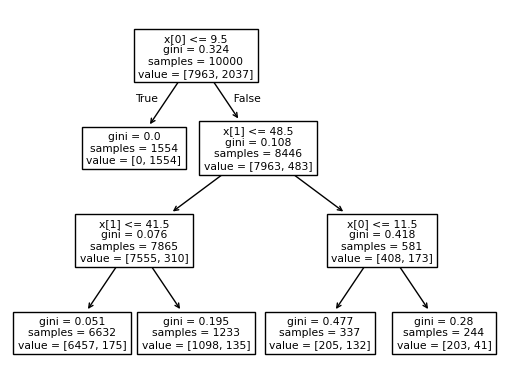

In [ ]:
tree.plot_tree(clf)

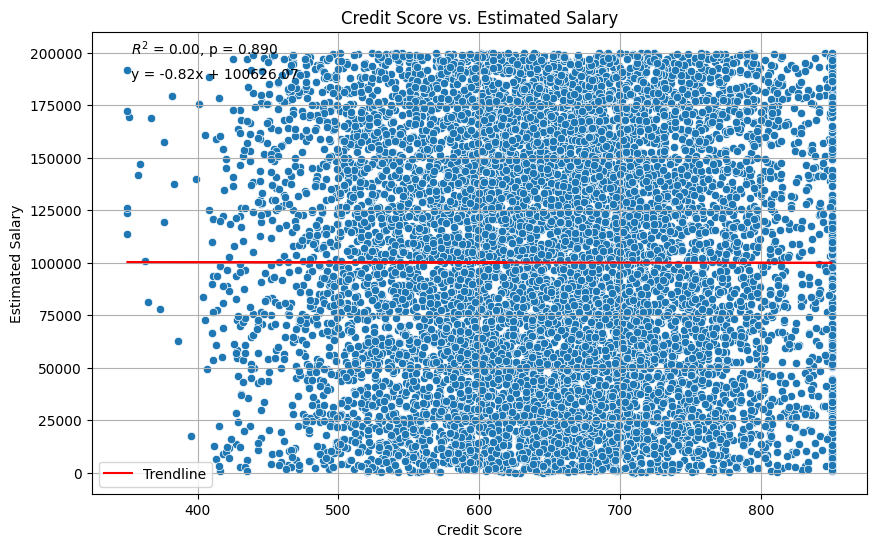

In [ ]:
# prompt: make a scatter plot showing the relationship between credit score and estimated salary with a trendline, R2 and p-value displayed and line equation displayed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming 'bank' DataFrame is already loaded as in the provided code.
# Replace 'bank' with your actual DataFrame name if different.

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=bank)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(bank['CreditScore'], bank['EstimatedSalary'])

# Add the trendline
plt.plot(bank['CreditScore'], slope * bank['CreditScore'] + intercept, color='red', label='Trendline')

# Display R-squared, p-value, and line equation
r_squared = r_value**2
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.2f}, p = {p_value:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'{equation}', transform=plt.gca().transAxes)


# Customize the plot (optional)
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.title('Credit Score vs. Estimated Salary')
plt.legend()
plt.grid(True)
plt.show()


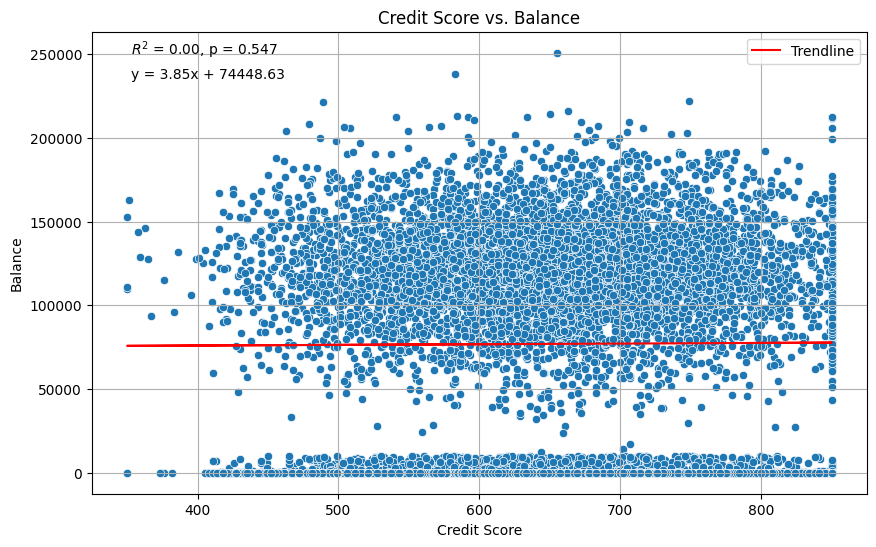

In [ ]:
# prompt: make a scatter plot showing the relationship between credit score and estimated salary with a trendline, R2 and p-value displayed and line equation displayed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming 'bank' DataFrame is already loaded as in the provided code.
# Replace 'bank' with your actual DataFrame name if different.

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='Balance', data=bank)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(bank['CreditScore'], bank['Balance'])

# Add the trendline
plt.plot(bank['CreditScore'], slope * bank['CreditScore'] + intercept, color='red', label='Trendline')

# Display R-squared, p-value, and line equation
r_squared = r_value**2
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.2f}, p = {p_value:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'{equation}', transform=plt.gca().transAxes)


# Customize the plot (optional)
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.title('Credit Score vs. Balance')
plt.legend()
plt.grid(True)
plt.show()


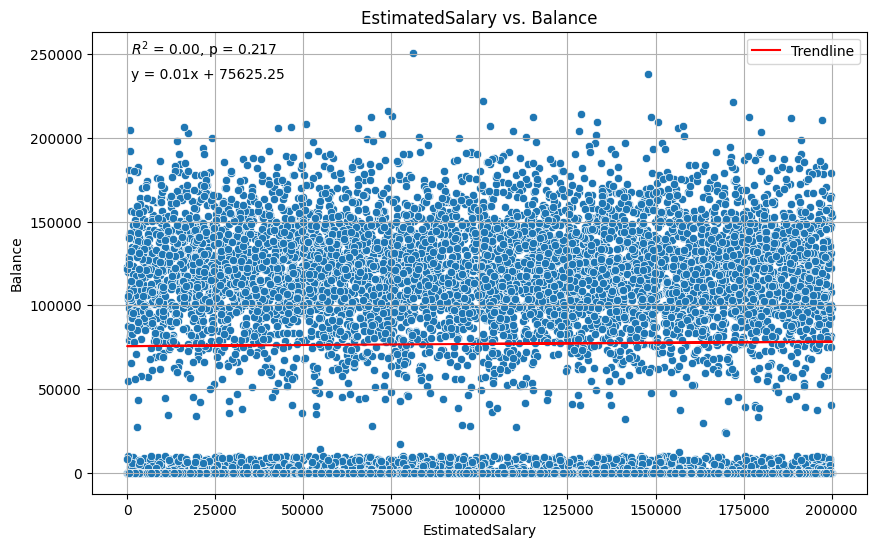

In [ ]:
# prompt: make a scatter plot showing the relationship between credit score and estimated salary with a trendline, R2 and p-value displayed and line equation displayed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming 'bank' DataFrame is already loaded as in the provided code.
# Replace 'bank' with your actual DataFrame name if different.

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EstimatedSalary', y='Balance', data=bank)

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(bank['EstimatedSalary'], bank['Balance'])

# Add the trendline
plt.plot(bank['EstimatedSalary'], slope * bank['EstimatedSalary'] + intercept, color='red', label='Trendline')

# Display R-squared, p-value, and line equation
r_squared = r_value**2
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.2f}, p = {p_value:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'{equation}', transform=plt.gca().transAxes)


# Customize the plot (optional)
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.title('EstimatedSalary vs. Balance')
plt.legend()
plt.grid(True)
plt.show()


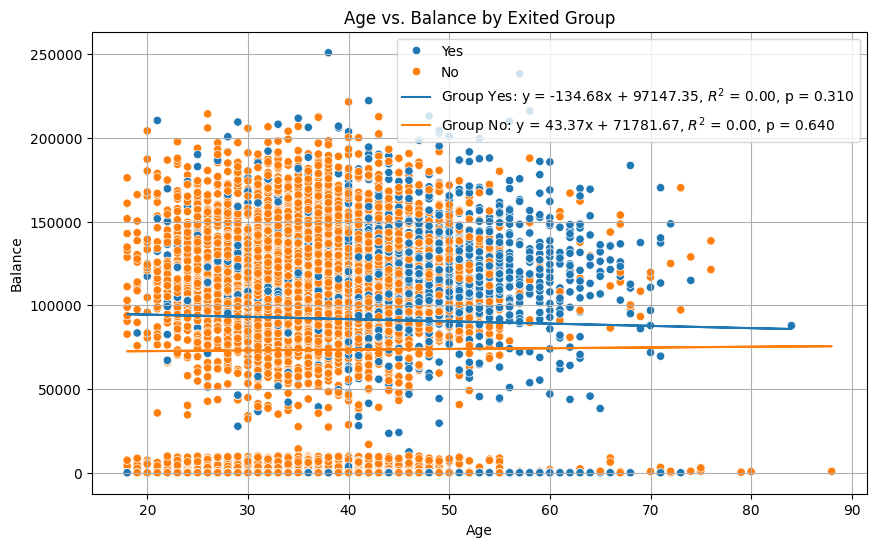

In [ ]:
# prompt: make a group scatter plot showing the relationship between age and balance
# the two groups are Exited = Yes and Exited = No
# add trendlines, R2s, p-values and displayed the line equation for both groups

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming 'bank' DataFrame is already loaded as in the provided code.
# Replace 'bank' with your actual DataFrame name if different.

# Create the grouped scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=bank)

# Calculate and plot trendlines, R-squared, p-values, and equations for each group
for group in bank['Exited'].unique():
    subset = bank[bank['Exited'] == group]
    slope, intercept, r_value, p_value, std_err = linregress(subset['Age'], subset['Balance'])
    plt.plot(subset['Age'], slope * subset['Age'] + intercept, label=f'Group {group}: y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r_value**2:.2f}, p = {p_value:.3f}')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance by Exited Group')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-45-35a1428e5f28>:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



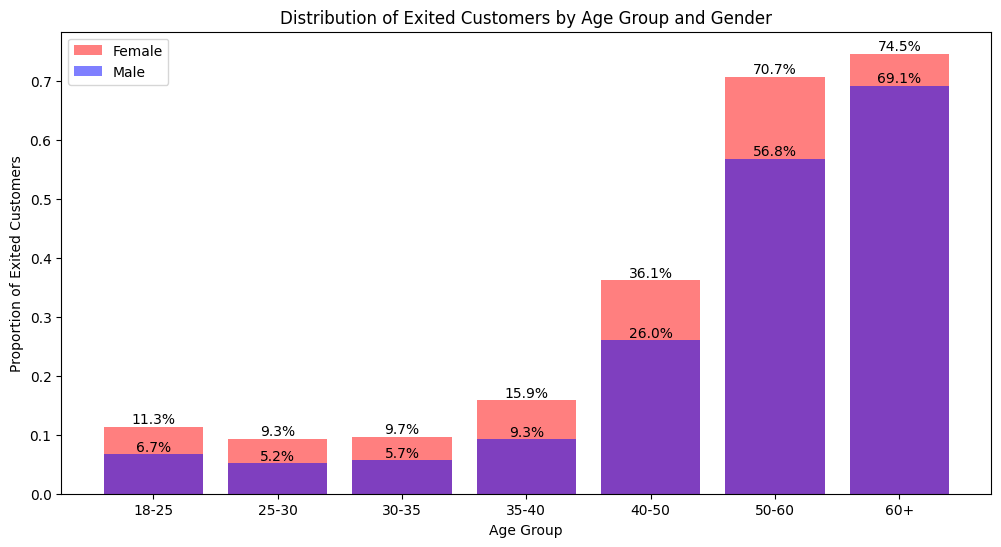

In [ ]:
# prompt: take the code in the above cell but add exited proportion numbers to the top of male/female bars

# Create age group categories
bins = [18, 25, 30, 35, 40, 50, 60, float('inf')]
labels = ['18-25', '25-30', '30-35', '35-40', '40-50', '50-60', '60+']
bank['AgeGroup'] = pd.cut(bank['Age'], bins=bins, labels=labels, right=False)

# Calculate the proportion of exited customers for each age group and gender
exited_by_group_gender = bank.groupby(['AgeGroup', 'Gender'])['Exited'].value_counts(normalize=True).unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Iterate through age groups and genders
for (age_group, gender) in exited_by_group_gender.index: # Iterate through a MultiIndex
    # Extract data for the current age group and gender
    group_data = exited_by_group_gender.loc[(age_group, gender)]

    # Plot for Female
    if gender == 'Female':
        bar = plt.bar(age_group, group_data['Yes'], color='red', alpha=0.5, label='Female' if age_group == '18-25' else "")  # Only label once
        plt.text(bar[0].get_x() + bar[0].get_width()/2, bar[0].get_height(), f"{group_data['Yes']*100:.1f}%", ha='center', va='bottom')
    # Plot for Male
    else:  # gender == 'Male'
        bar = plt.bar(age_group, group_data['Yes'], color='blue', alpha=0.5, label='Male' if age_group == '18-25' else "") # Only label once
        plt.text(bar[0].get_x() + bar[0].get_width()/2, bar[0].get_height(), f"{group_data['Yes']*100:.1f}%", ha='center', va='bottom')


plt.xlabel("Age Group")
plt.ylabel("Proportion of Exited Customers")
plt.title("Distribution of Exited Customers by Age Group and Gender")
plt.legend()
plt.show()


In [ ]:
bank.AgeGroup.value_counts()

AgeGroup
40-50    2615
35-40    2524
30-35    2250
25-30    1184
50-60     766
18-25     457
60+       204
Name: count, dtype: int64